<a href="https://www.kaggle.com/code/firecase/body-signal-of-smoking-83-accuracy?scriptVersionId=160627195" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/body-signal-of-smoking/smoking.csv
/kaggle/input/body-signal-of-smoking/competition_format/y_test.csv
/kaggle/input/body-signal-of-smoking/competition_format/x_test.csv
/kaggle/input/body-signal-of-smoking/competition_format/y_train.csv
/kaggle/input/body-signal-of-smoking/competition_format/x_train.csv


In [2]:

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# <span style="text-align:center">⬇️ Import Libraries</span>


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score,confusion_matrix,classification_report
pd.set_option("display.max_columns",None)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [4]:
df=pd.read_csv("/kaggle/input/body-signal-of-smoking/smoking.csv")

In [5]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [6]:
print(f" Dataset have {df.shape[0]} rows and {df.shape[1]} Columns")

 Dataset have 55692 rows and 27 Columns


In [7]:
# Checking null values
df.isnull().mean()

ID                     0.0
gender                 0.0
age                    0.0
height(cm)             0.0
weight(kg)             0.0
waist(cm)              0.0
eyesight(left)         0.0
eyesight(right)        0.0
hearing(left)          0.0
hearing(right)         0.0
systolic               0.0
relaxation             0.0
fasting blood sugar    0.0
Cholesterol            0.0
triglyceride           0.0
HDL                    0.0
LDL                    0.0
hemoglobin             0.0
Urine protein          0.0
serum creatinine       0.0
AST                    0.0
ALT                    0.0
Gtp                    0.0
oral                   0.0
dental caries          0.0
tartar                 0.0
smoking                0.0
dtype: float64

In [8]:
df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,76.004830,99.312325,196.901422,126.665697,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,9.679278,20.795591,36.297940,71.639817,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,46.000000,55.000000,8.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,89.000000,172.000000,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,96.000000,195.000000,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,104.000000,220.000000,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,146.000000,505.000000,445.000000,999.000000,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [9]:
df.describe(include="O").T

,count,unique,top,freq
gender,55692,2,M,35401
oral,55692,1,Y,55692
tartar,55692,2,Y,30940


In [10]:
df["oral"].unique()

array(['Y'], dtype=object)

In [11]:
print(df["gender"].unique())
print(df["tartar"].unique())

['F' 'M']
['Y' 'N']


In [12]:
#  We will take all variable types out from dataset so we can use further

numerical_features=[var for var in df.columns if df[var].dtypes!="O"]
categorical_features=[var for var in df.columns if df[var].dtypes=="O"]
descrete_features=[var for var in numerical_features if len(df[var].unique())<25]
contineous_features=[var for var in numerical_features if var not in descrete_features]


In [13]:
print(f"Numerical features : {numerical_features}\n")

print("_____________________________________________________________\n")
print(f"categorical features : {categorical_features} \n")
print("____________________________________________________________________\n")

print(f" Descrete features : {descrete_features} \n")
print("______________________________________________________________\n")

print(f"Contineous features: {contineous_features} \n")
print("_________________________________________________________")



Numerical features : ['ID', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'smoking']

_____________________________________________________________

categorical features : ['gender', 'oral', 'tartar'] 

____________________________________________________________________

 Descrete features : ['age', 'height(cm)', 'weight(kg)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries', 'smoking'] 

______________________________________________________________

Contineous features: ['ID', 'waist(cm)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp'] 

______________________________________

# <span style="text-align:center">Visualization</span>


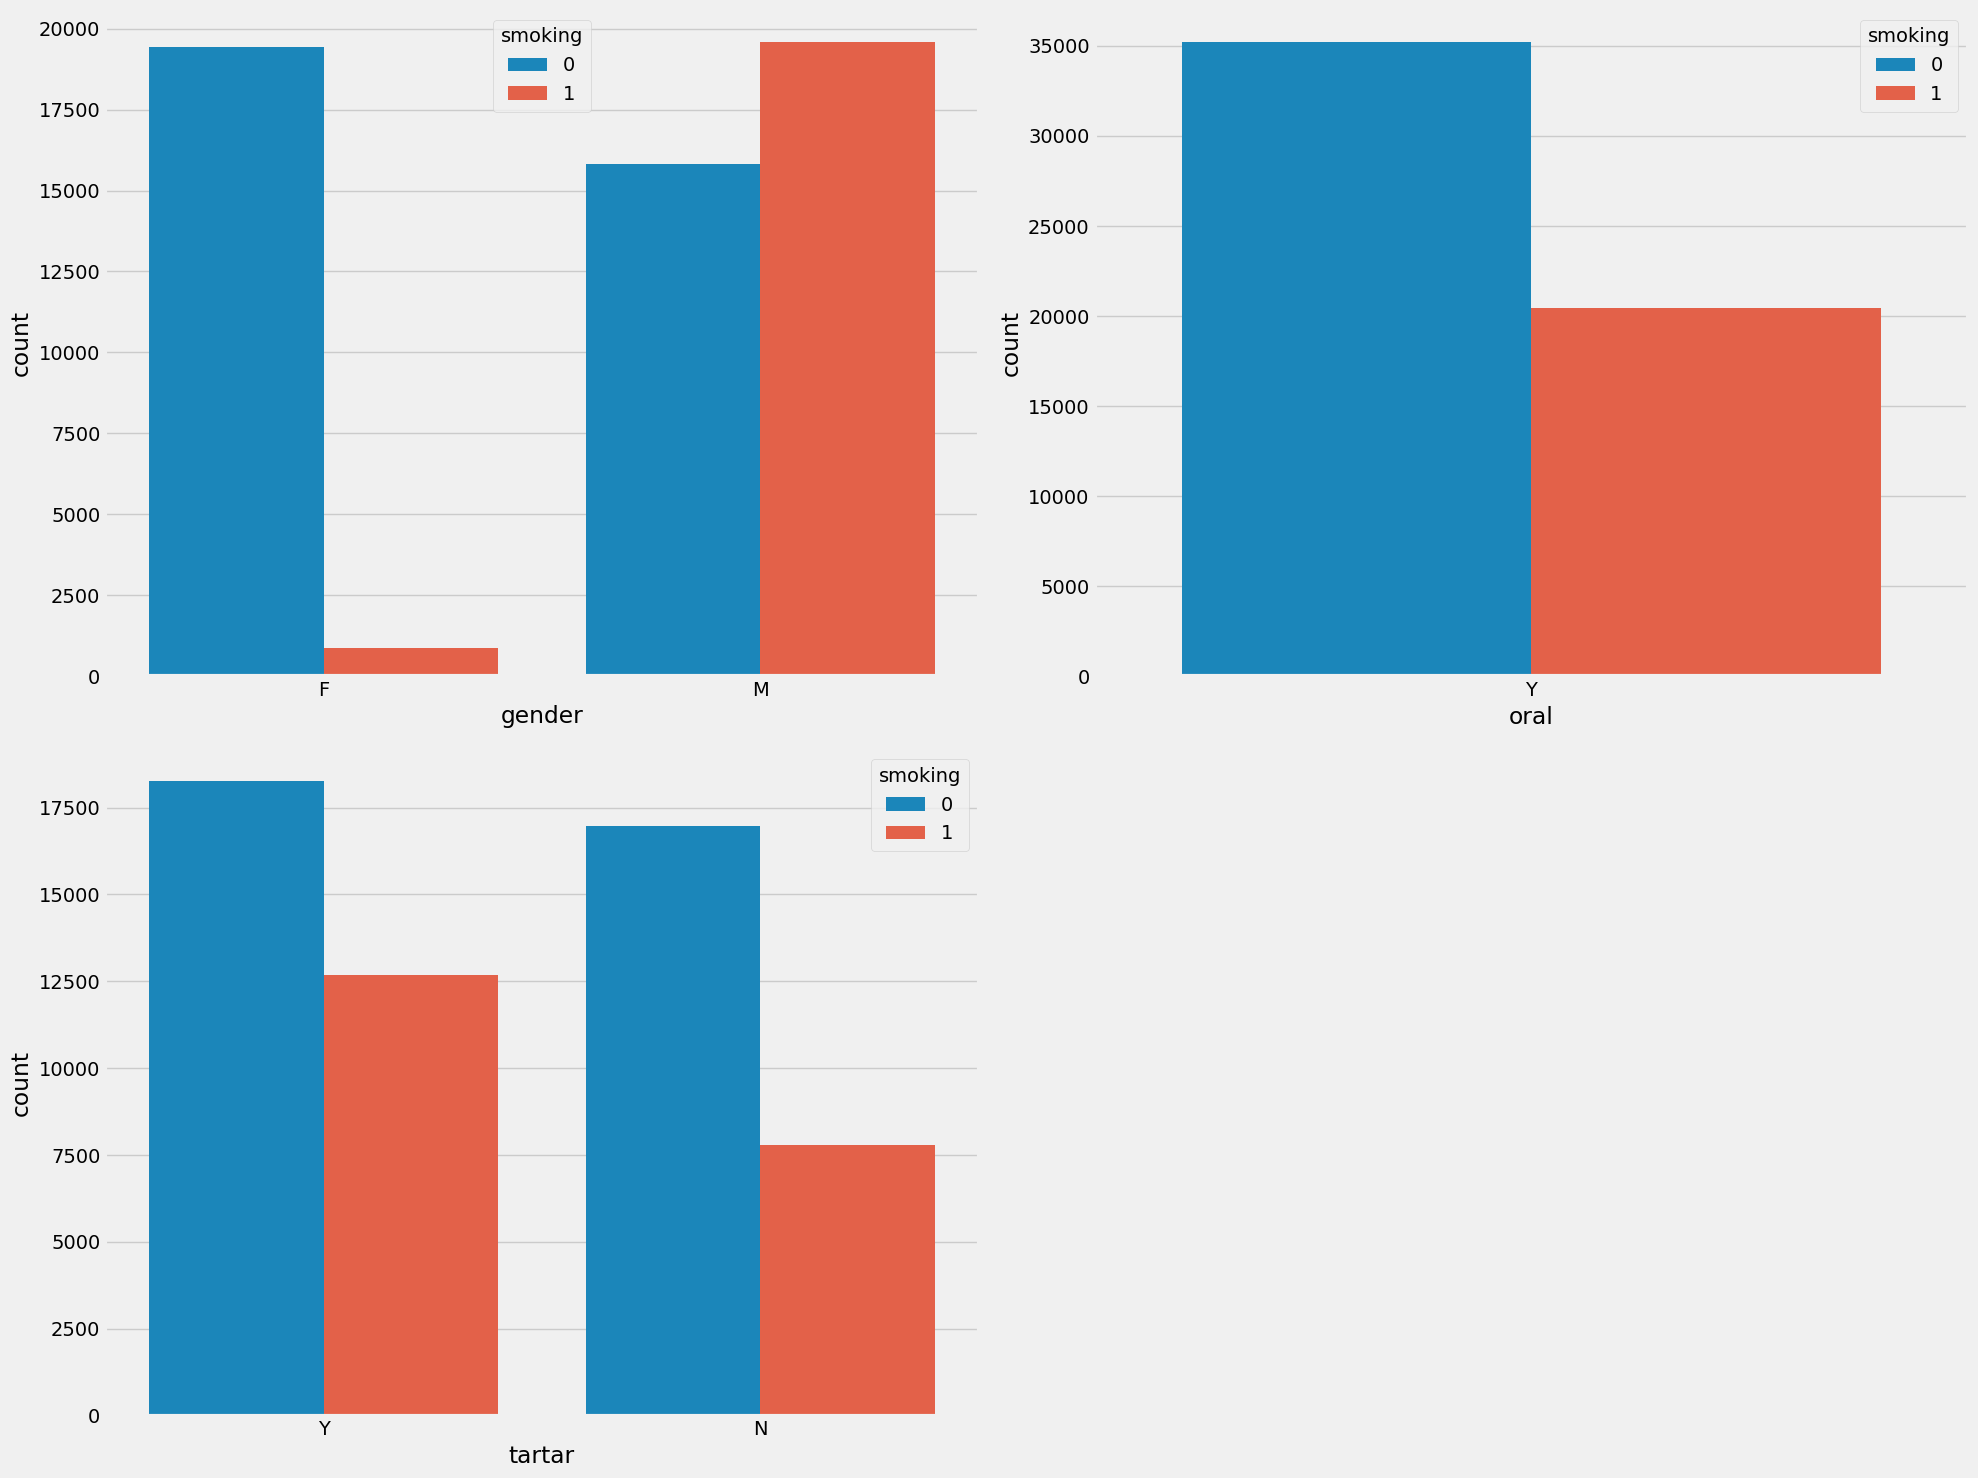

In [14]:
plt.style.use("fivethirtyeight")

plt.figure(figsize=(20,15))

a=0

for var in categorical_features:
    a=a+1
    plt.subplot(2,2,a)
    sns.countplot(data=df,x=var, hue="smoking",)
    
plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='green'>💡 Observations:</font></h3>



* Over 18000 males smoke
* females who smoke are very less compared to males 


In [15]:
print(f"Percentage of males who smokes :", df[(df["gender"]=="M") & (df["smoking"]==1)].shape[0]/df[(df["gender"]=="M")].shape[0]*100)
print(f"Percentage of males who do not smokes :", df[(df["gender"]=="M") & (df["smoking"]==0)].shape[0]/df[(df["gender"]=="M")].shape[0]*100)

print("------------------------------------------------------------------------")
print(f"Percentage of females who smokes :", df[(df["gender"]!="M") & (df["smoking"]==1)].shape[0]/df[(df["gender"]!="M")].shape[0]*100)

print(f"Percentage of females who do not smokes :", df[(df["gender"]!="M") & (df["smoking"]==0)].shape[0]/df[(df["gender"]!="M")].shape[0]*100)

Percentage of males who smokes : 55.35436852066326
Percentage of males who do not smokes : 44.64563147933674
------------------------------------------------------------------------
Percentage of females who smokes : 4.233403972204425
Percentage of females who do not smokes : 95.76659602779557


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='green'>💡 Observations:</font></h3>

* we can see half percentage of males smokes and others dont
* also very less number of females smokes

In [16]:
print(f"the males who smokes and who has tartar status 'Y':", df[(df["tartar"]=="Y") & (df["smoking"]==1) & (df["gender"]=="M") ].shape[0]/df[df["gender"]=="M"].shape[0])
print(f"the males who smokes and who has tartar status 'N':", df[(df["tartar"]!="Y") & (df["smoking"]==1) & (df["gender"]=="M") ].shape[0]/df[df["gender"]=="M"].shape[0])

print("----------------------------------------------------")

print(f"the females who smokes and who has tartar status 'Y':", df[(df["tartar"]=="Y") & (df["smoking"]==1) & (df["gender"]!="M") ].shape[0]/df[df["gender"]!="M"].shape[0])
print(f"the females who smokes and who has tartar status 'N':", df[(df["tartar"]!="Y") & (df["smoking"]==1) & (df["gender"]!="M") ].shape[0]/df[df["gender"]!="M"].shape[0])

the males who smokes and who has tartar status 'Y': 0.3427869269229683
the males who smokes and who has tartar status 'N': 0.2107567582836643
----------------------------------------------------
the females who smokes and who has tartar status 'Y': 0.026859198659504212
the females who smokes and who has tartar status 'N': 0.015474841062540042


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='green'>💡 Observations:</font></h3>
    
* These percentages suggest that among both males and females who smoke, a higher proportion of males have tartar compared to females. Additionally, among both genders, a larger proportion of individuals who smoke have tartar ('Y') compared to those who do not have tartar ('N').

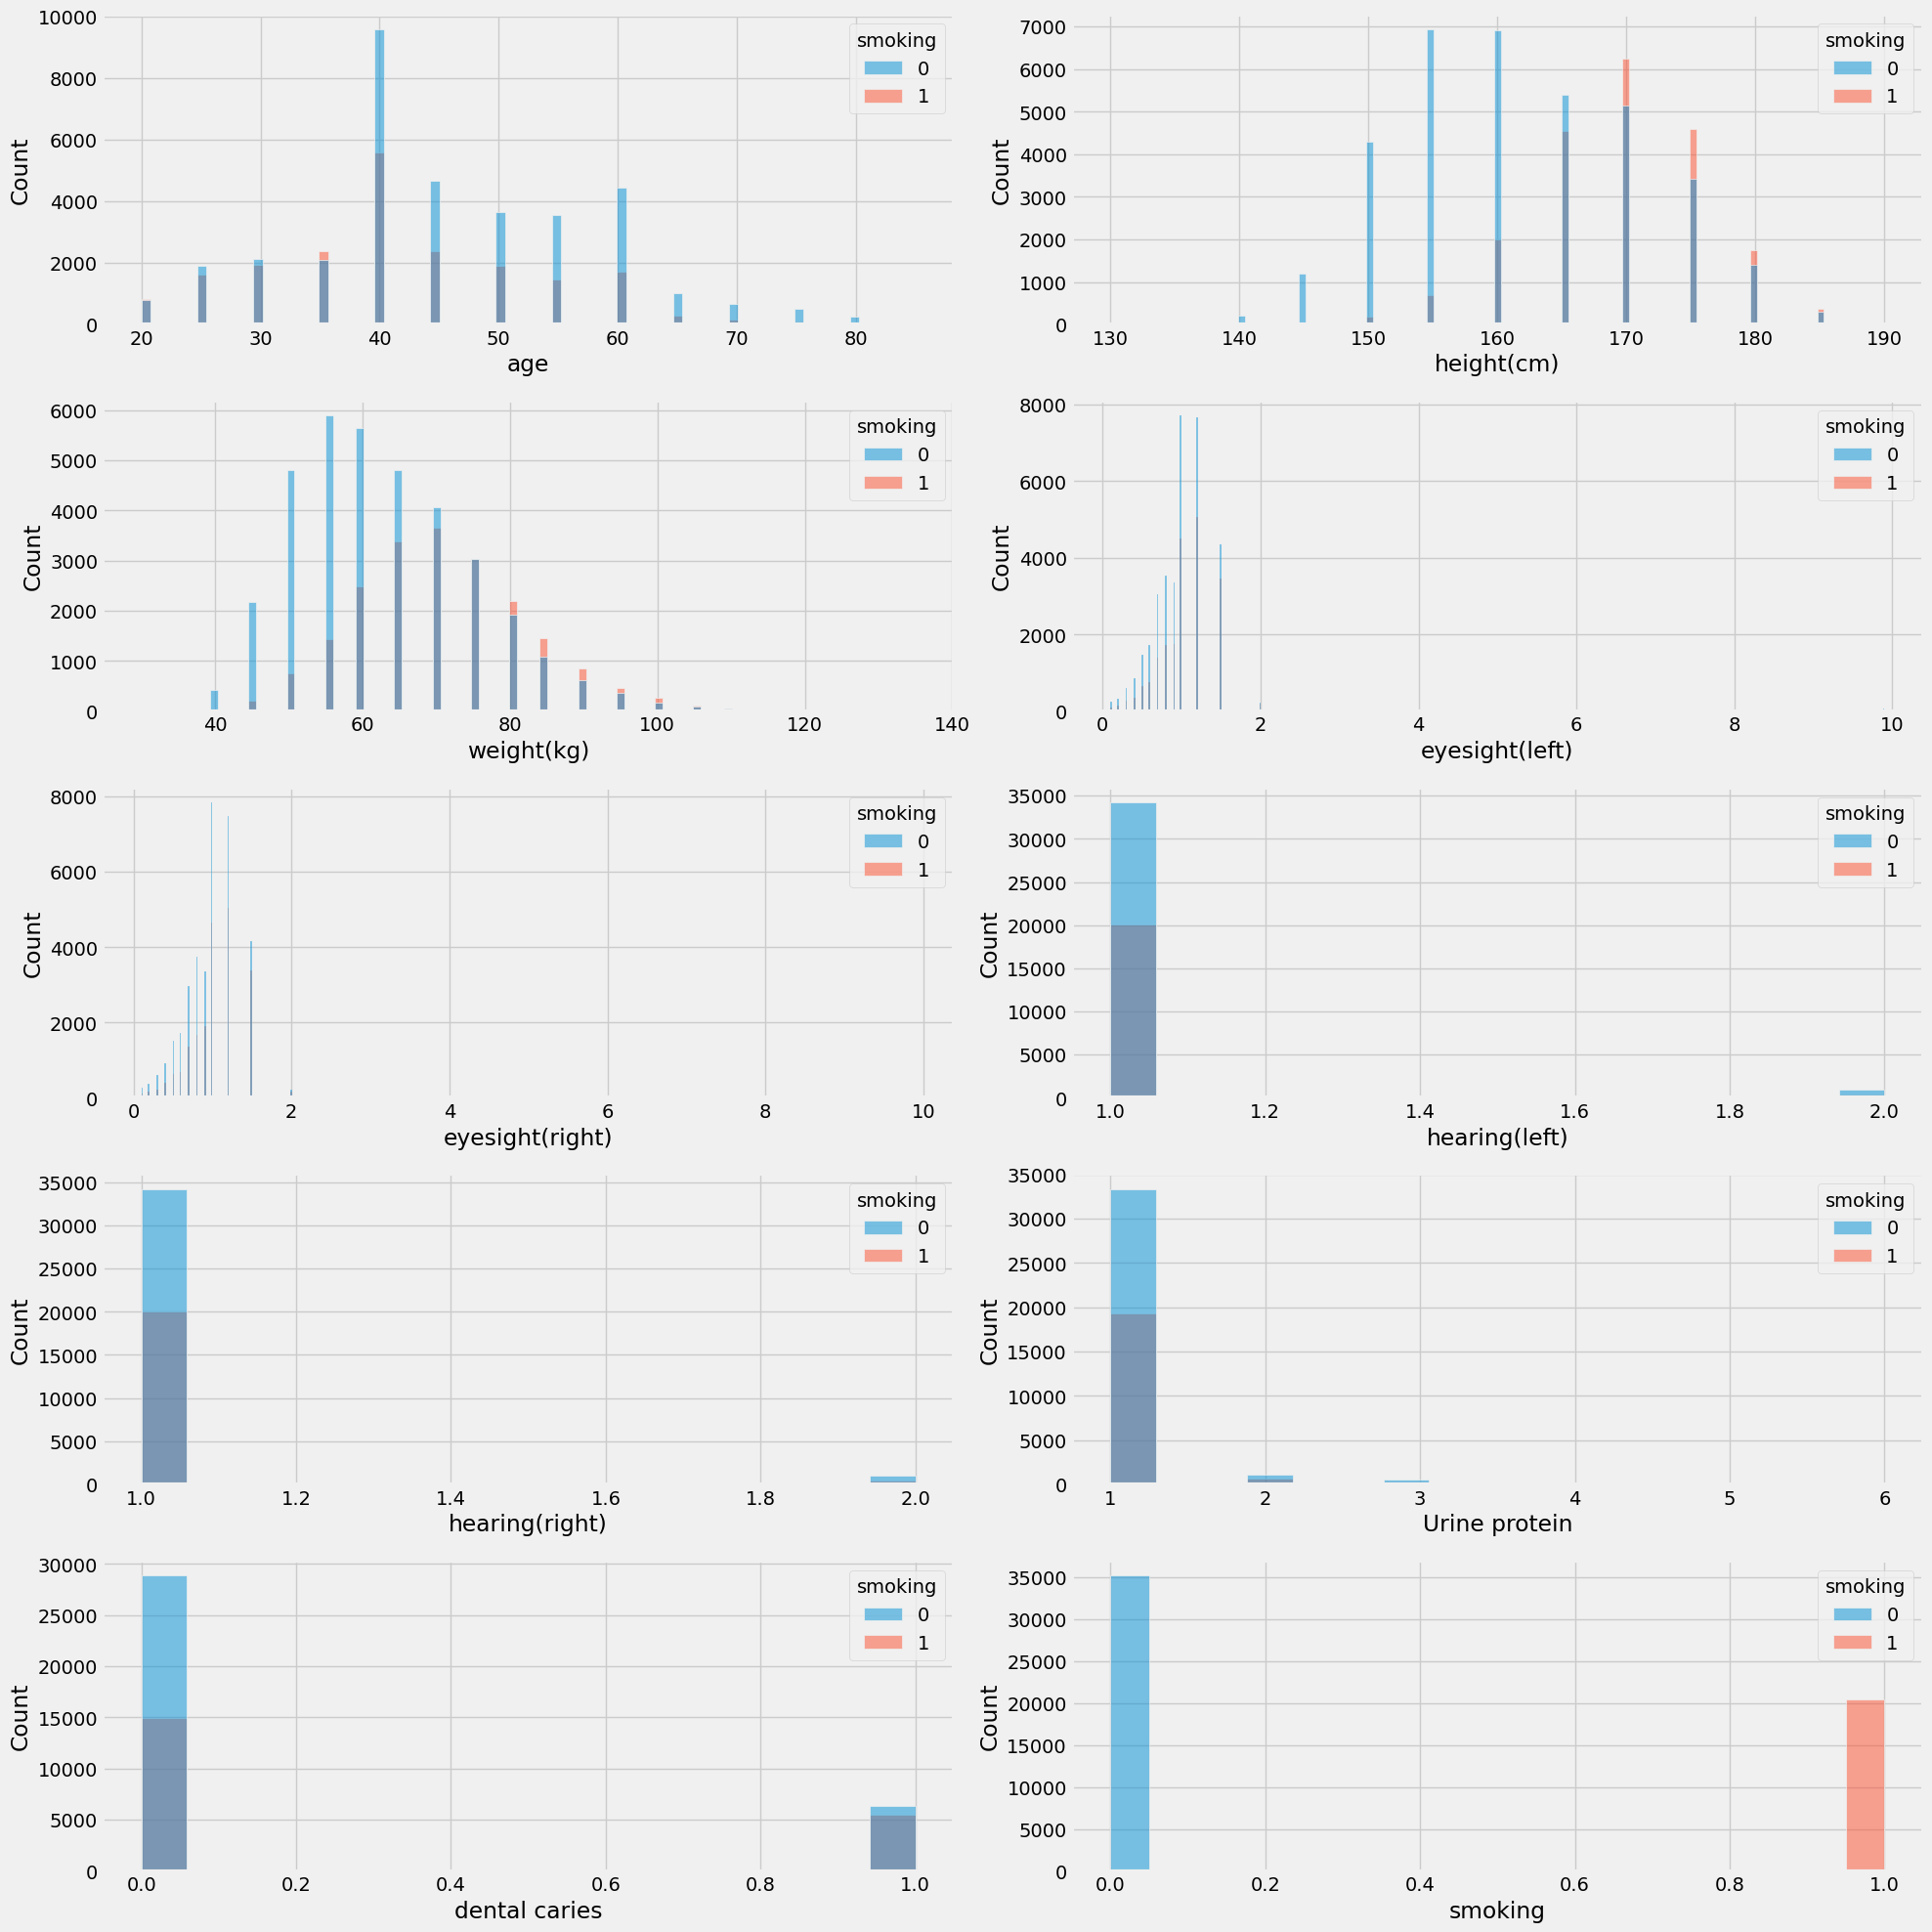

In [17]:
plt.style.use("fivethirtyeight")

plt.figure(figsize=(20,20))

a=0

for var in descrete_features:
    a=a+1
    plt.subplot(5,2,a)
    sns.histplot(data=df,x=var, hue="smoking",)
    
plt.tight_layout()
plt.show()

<div style="border-radius:10px; border: #0080FF solid; padding: 15px; background-color: #CEF6F5; font-size:100%; text-align:left">
<font color='#0080FF'>Question 1: Does age have effect on smoking?</font>
    
<font color='#0080FF'>Question 2: Does smokers have big heights?</font>    
<font color='#0080FF'>Question 3: does smoking have effect on weight?</font>

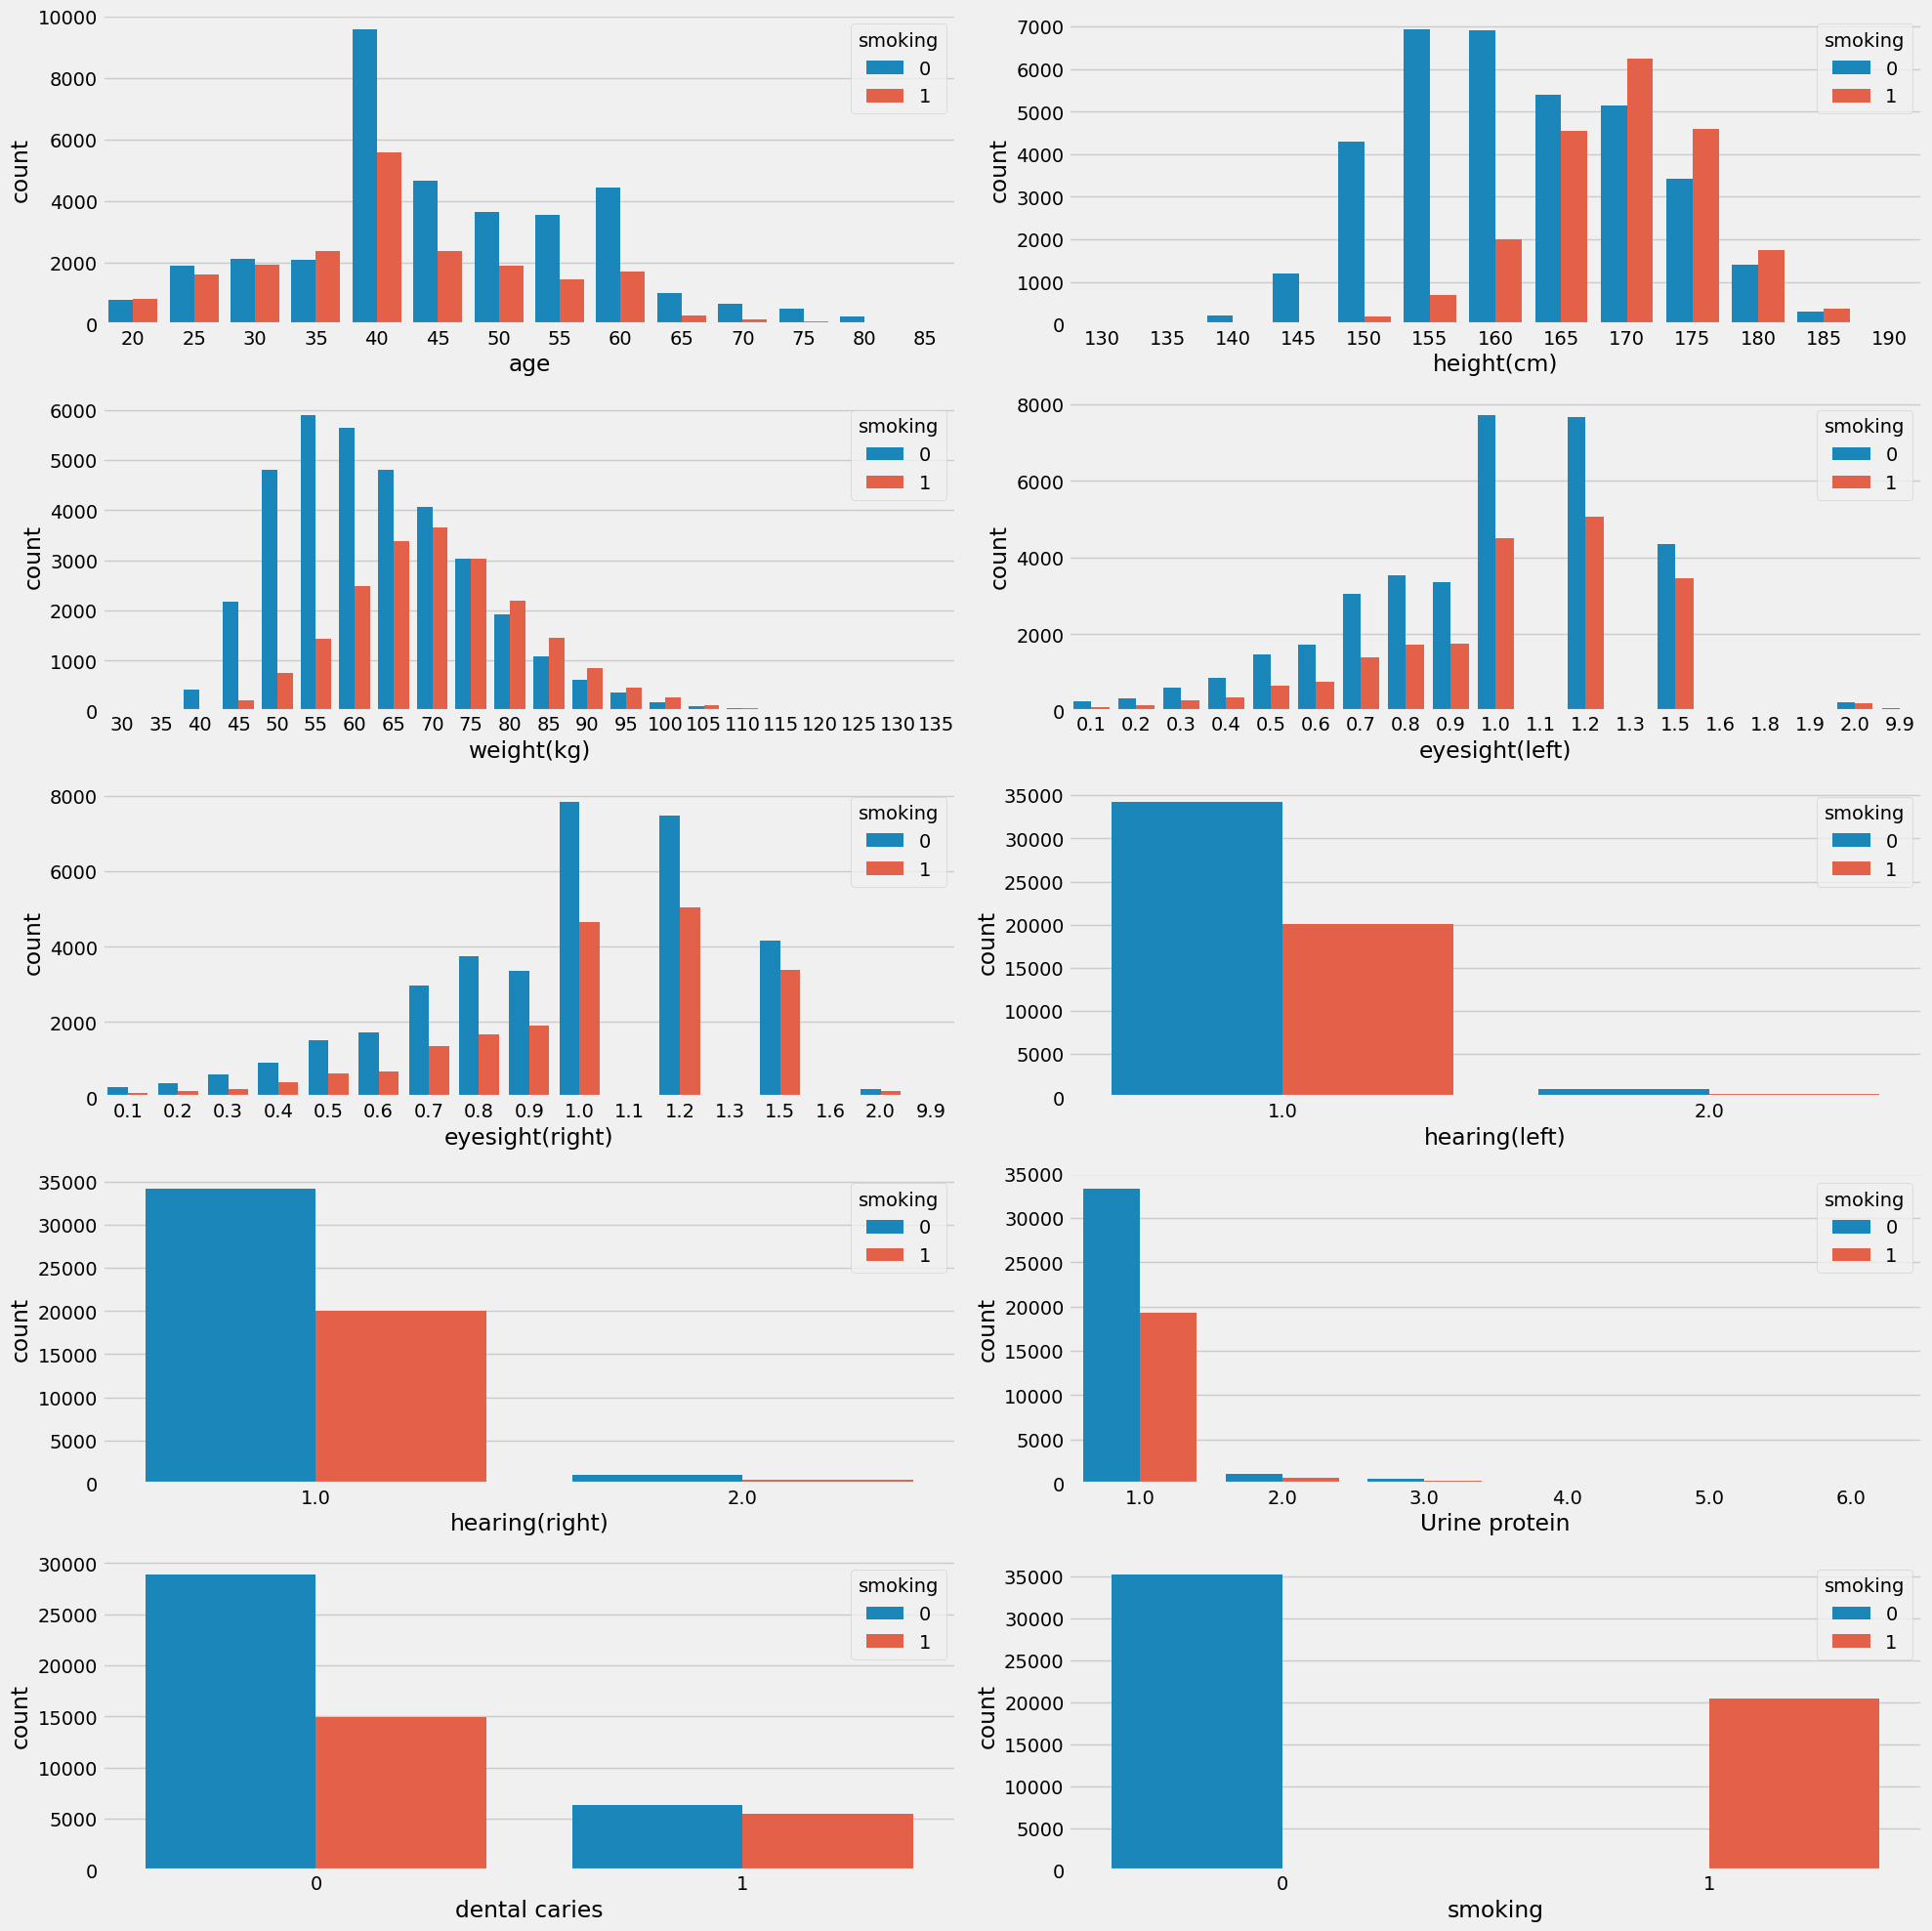

In [18]:
plt.style.use("fivethirtyeight")

plt.figure(figsize=(20,20))

a=0

for var in descrete_features:
    a=a+1
    plt.subplot(5,2,a)
    sns.countplot(data=df,x=var, hue="smoking",)
    
plt.tight_layout()
plt.show()

In [19]:
# plt.figure(figsize=(20,15))
# sns.pairplot(data=df, vars=contineous_features, hue="smoking", palette=None)



# # Show the plot
# plt.show()

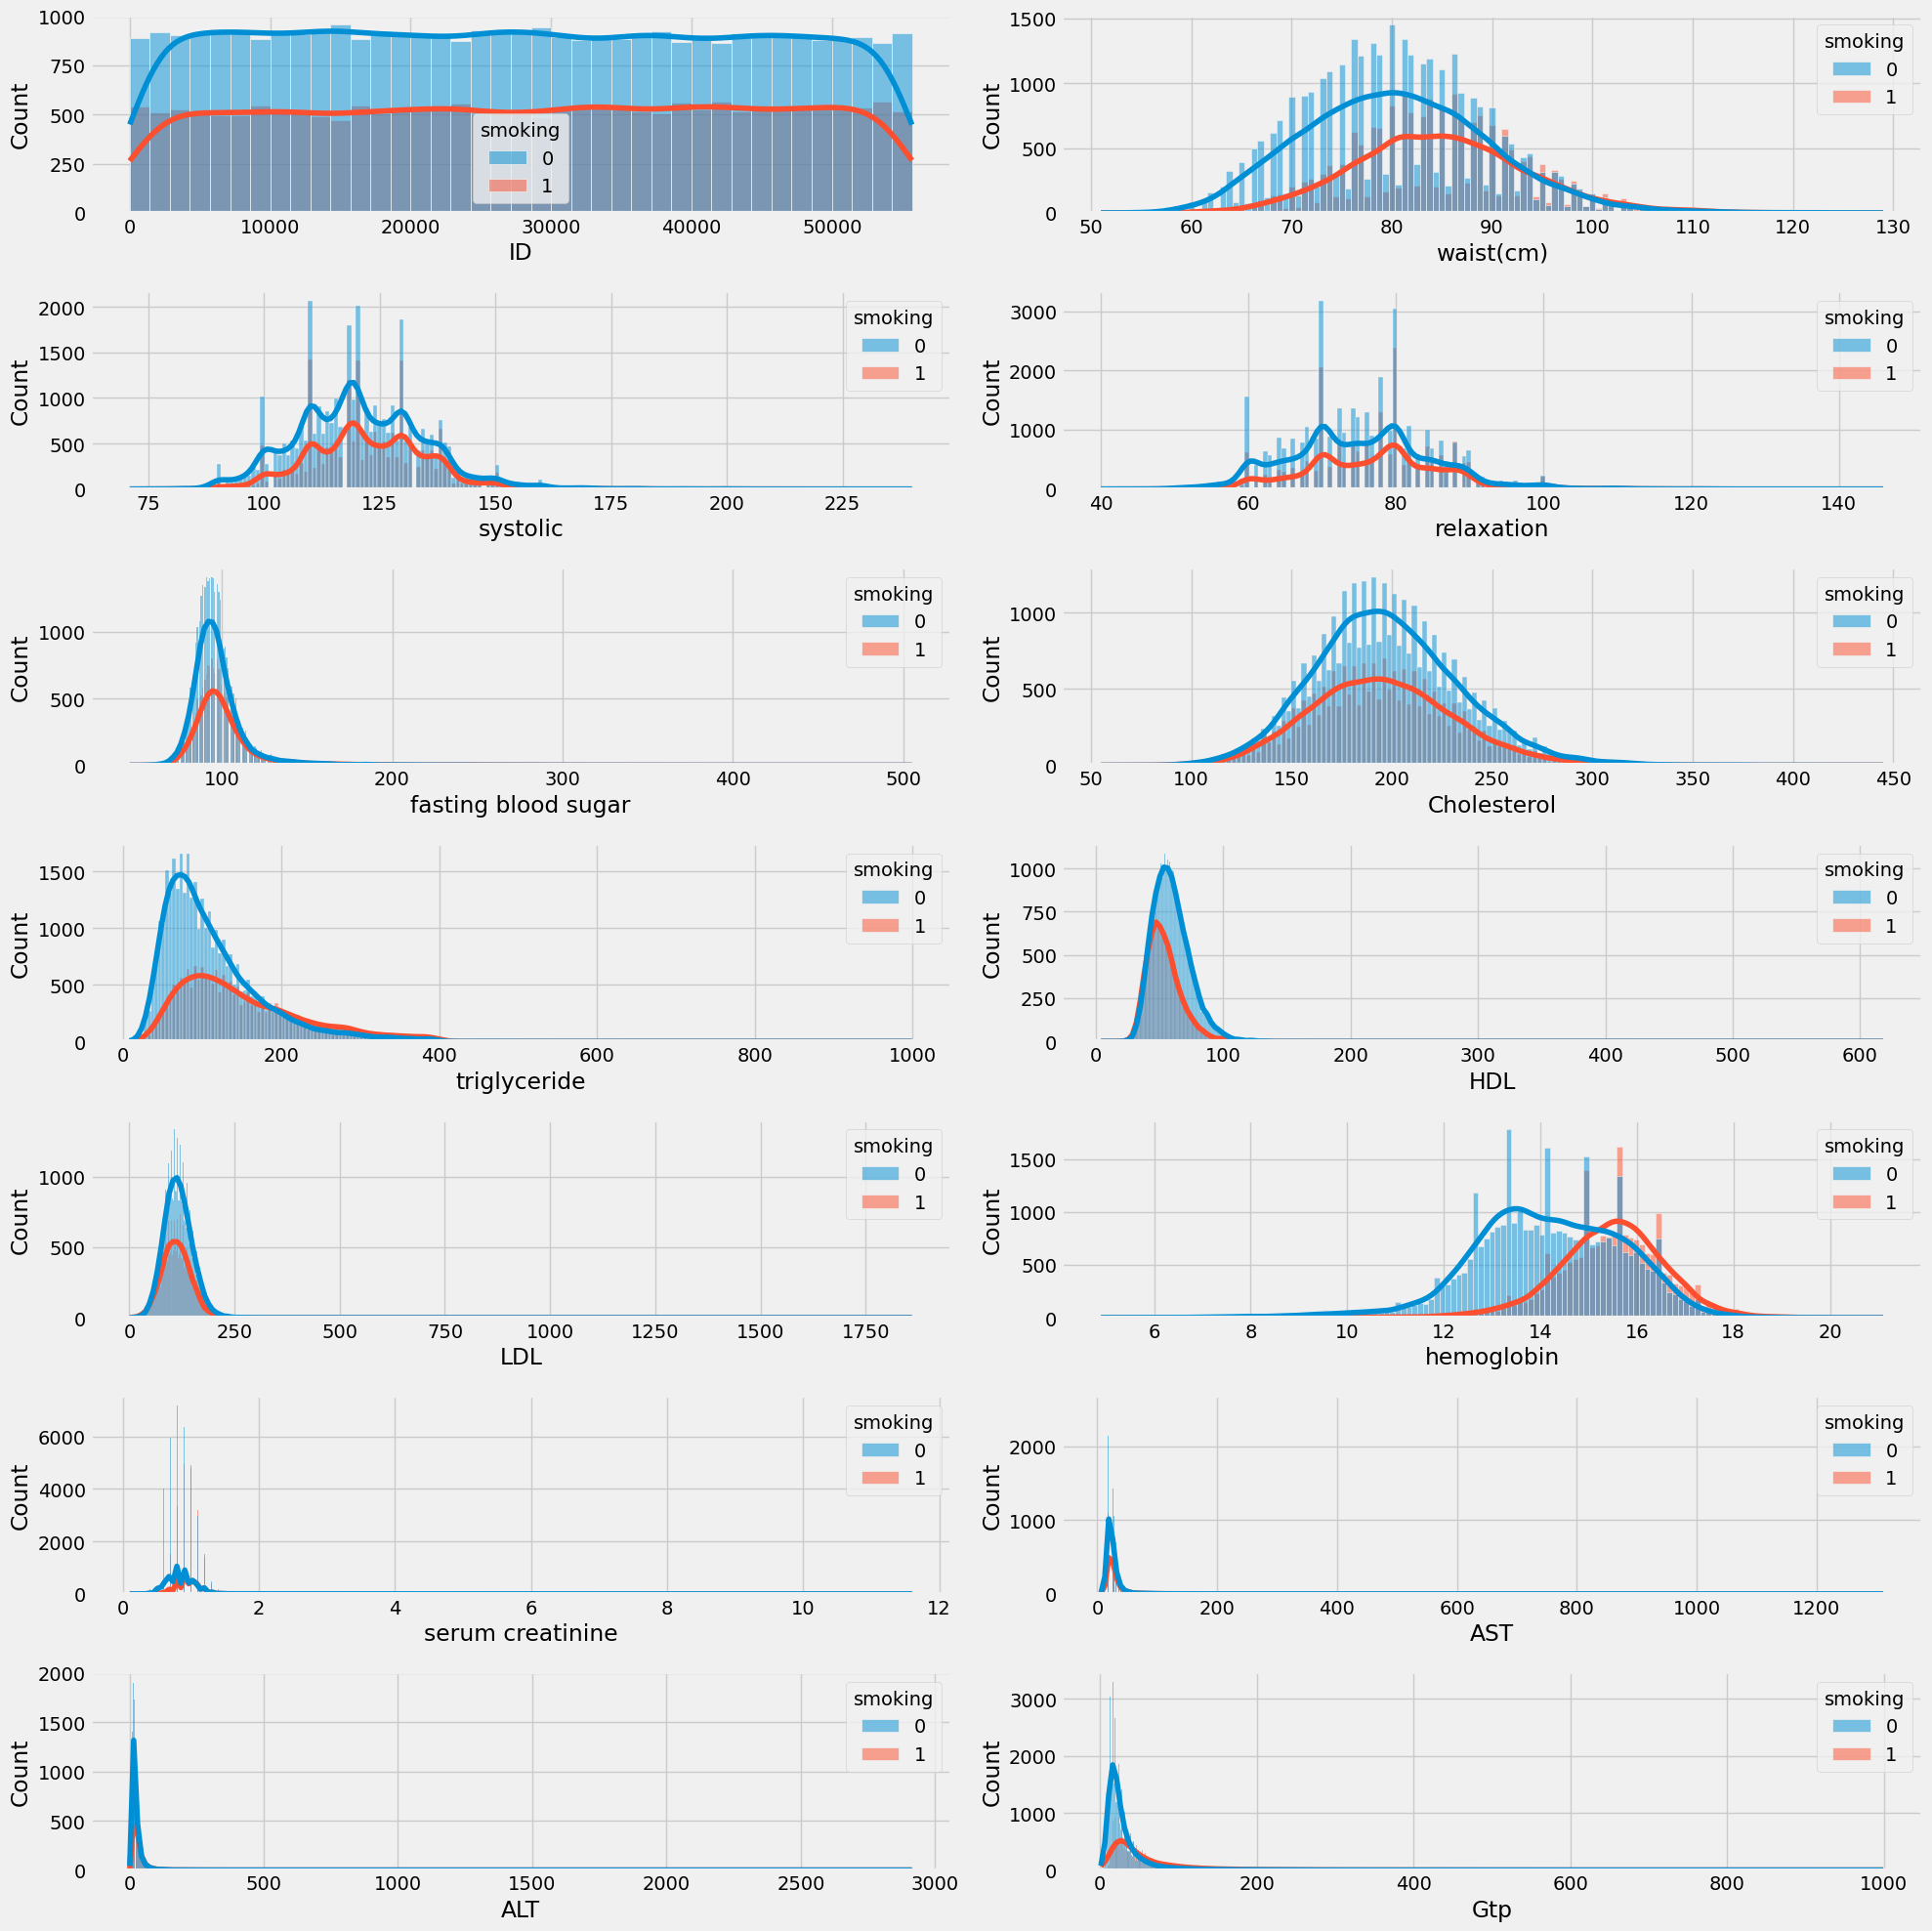

In [20]:
plt.style.use("fivethirtyeight")

plt.figure(figsize=(20,20))

a=0

for var in contineous_features:
    a=a+1
    plt.subplot(7,2,a)
    sns.histplot(data=df,x=var, hue="smoking", kde=True)
    
plt.tight_layout()
plt.show()



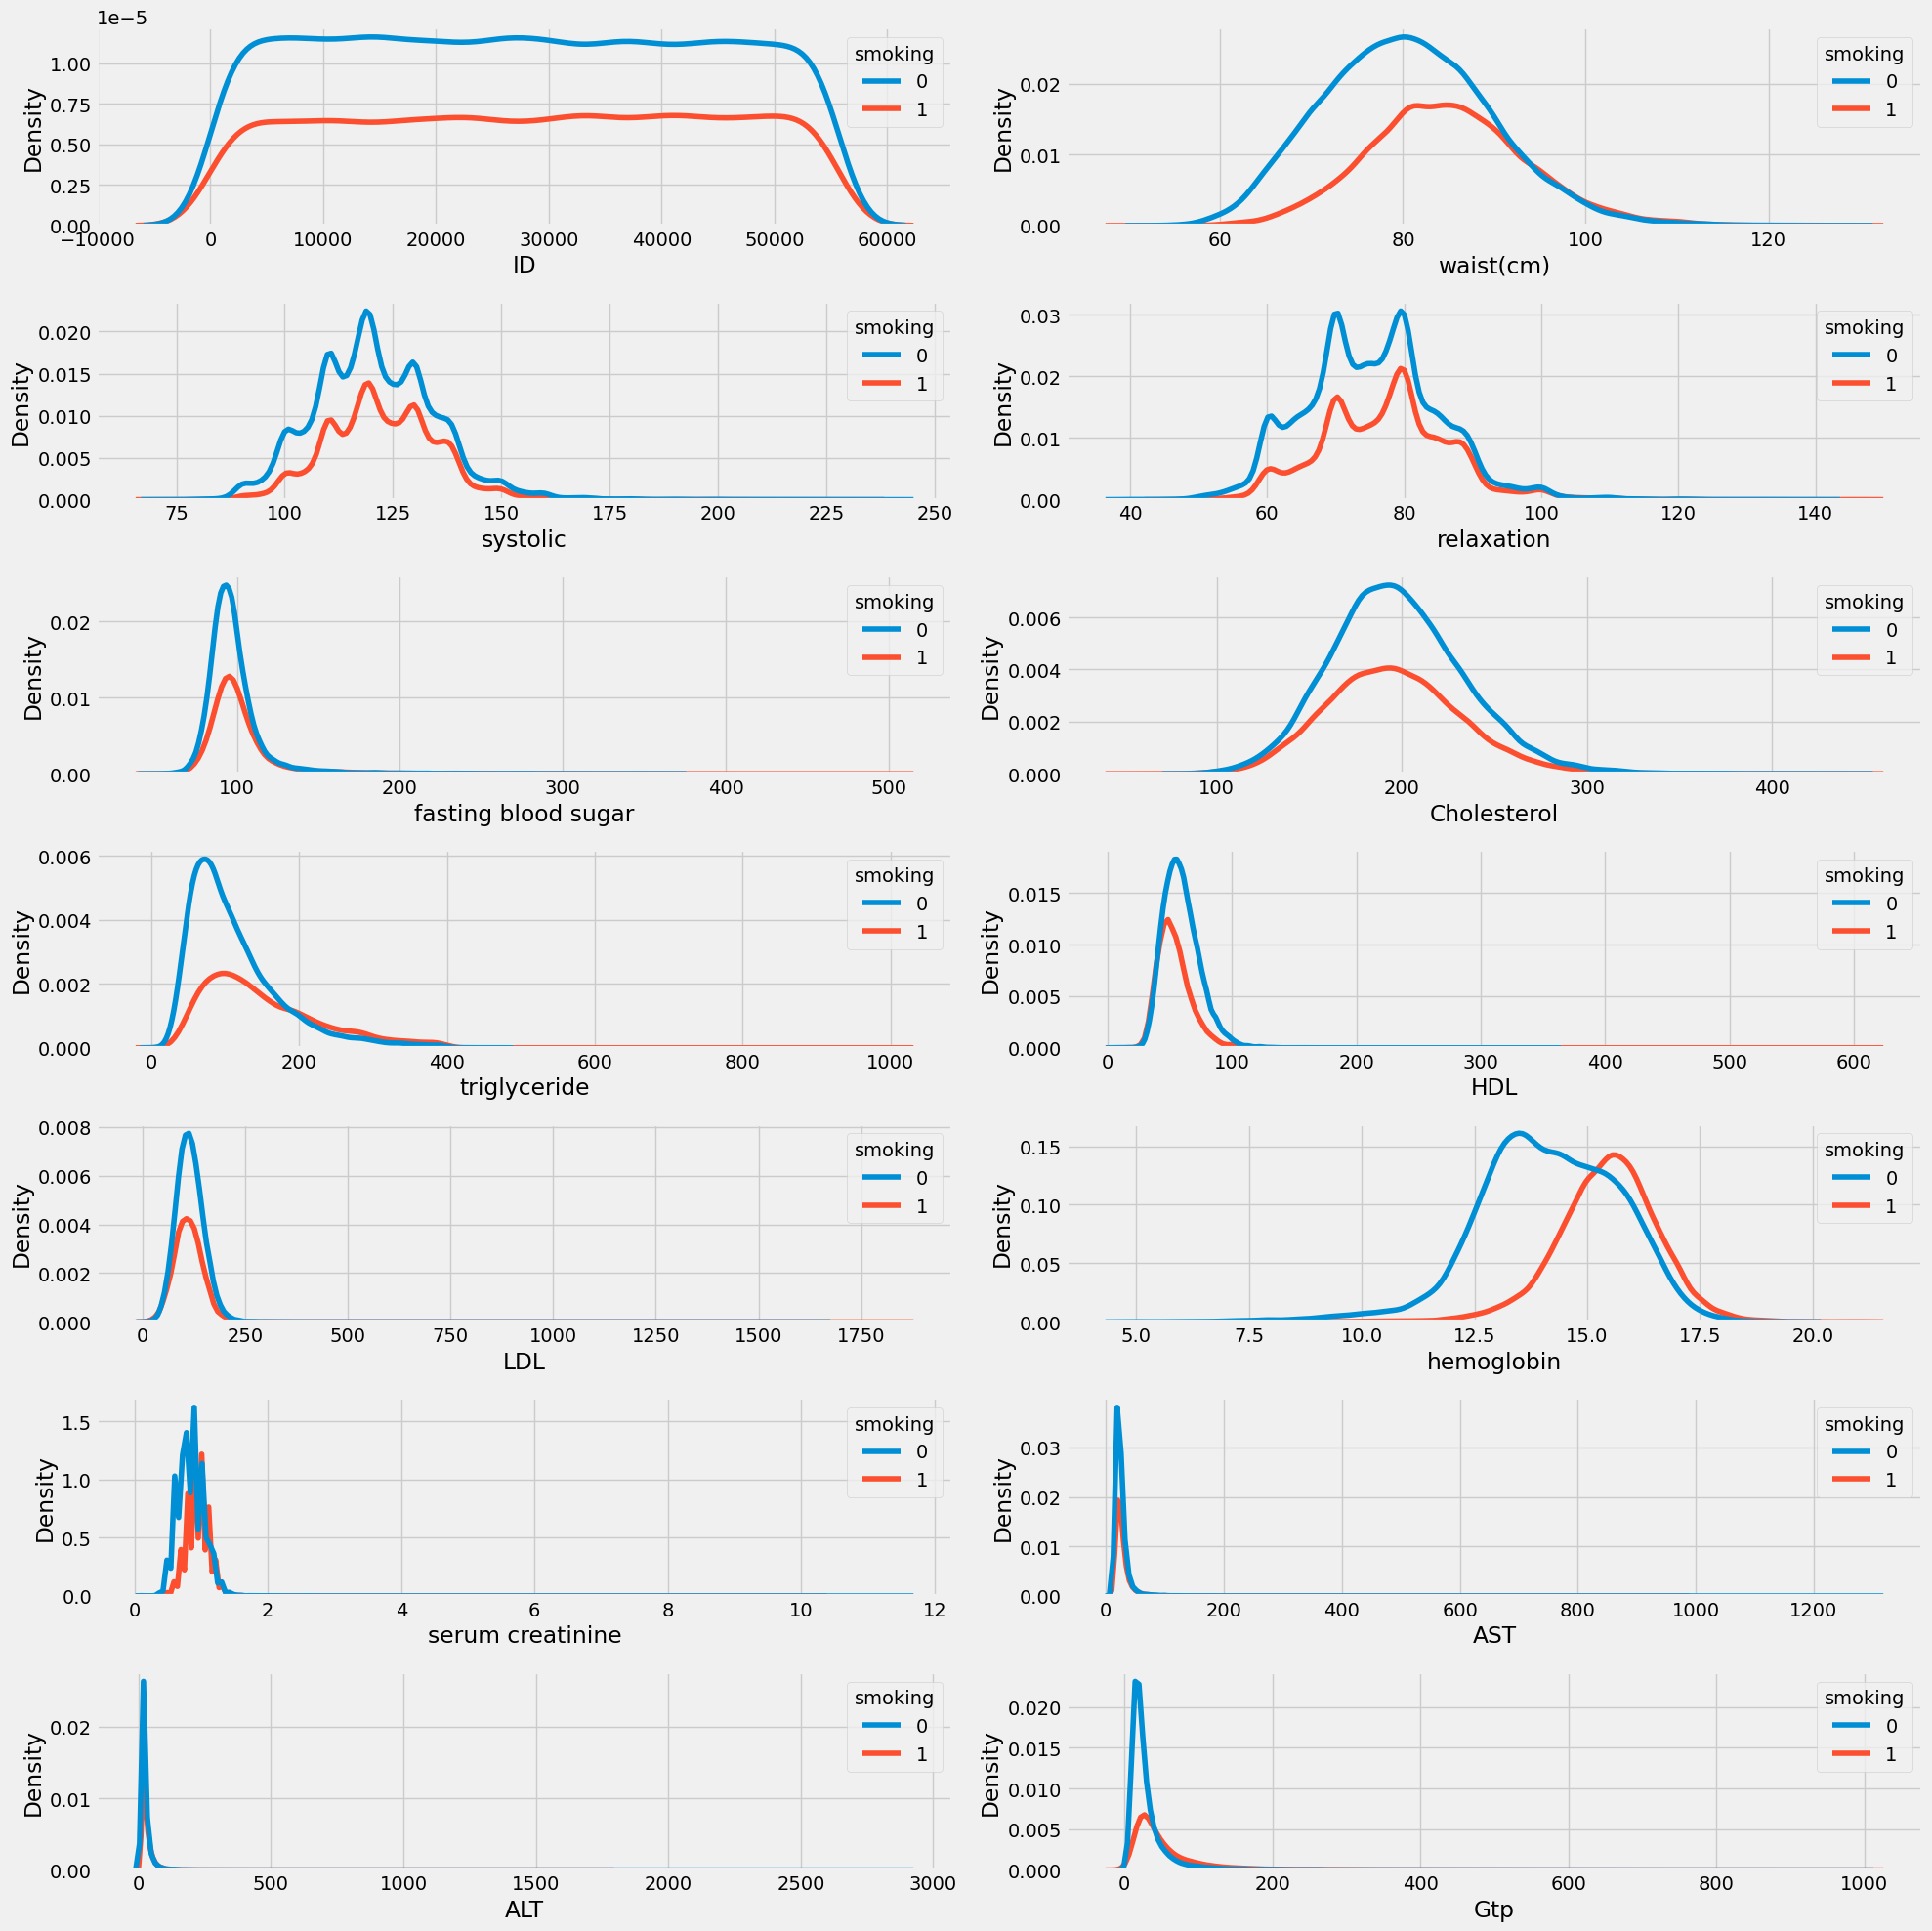

In [21]:
plt.style.use("fivethirtyeight")

plt.figure(figsize=(20,20))

a=0

for var in contineous_features:
    a=a+1
    plt.subplot(7,2,a)
    sns.kdeplot(data=df,x=var, hue="smoking")
    
plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='green'>💡 Observations:</font></h3>

* W e can se that most of the features are nearly normally distributed

<Axes: >

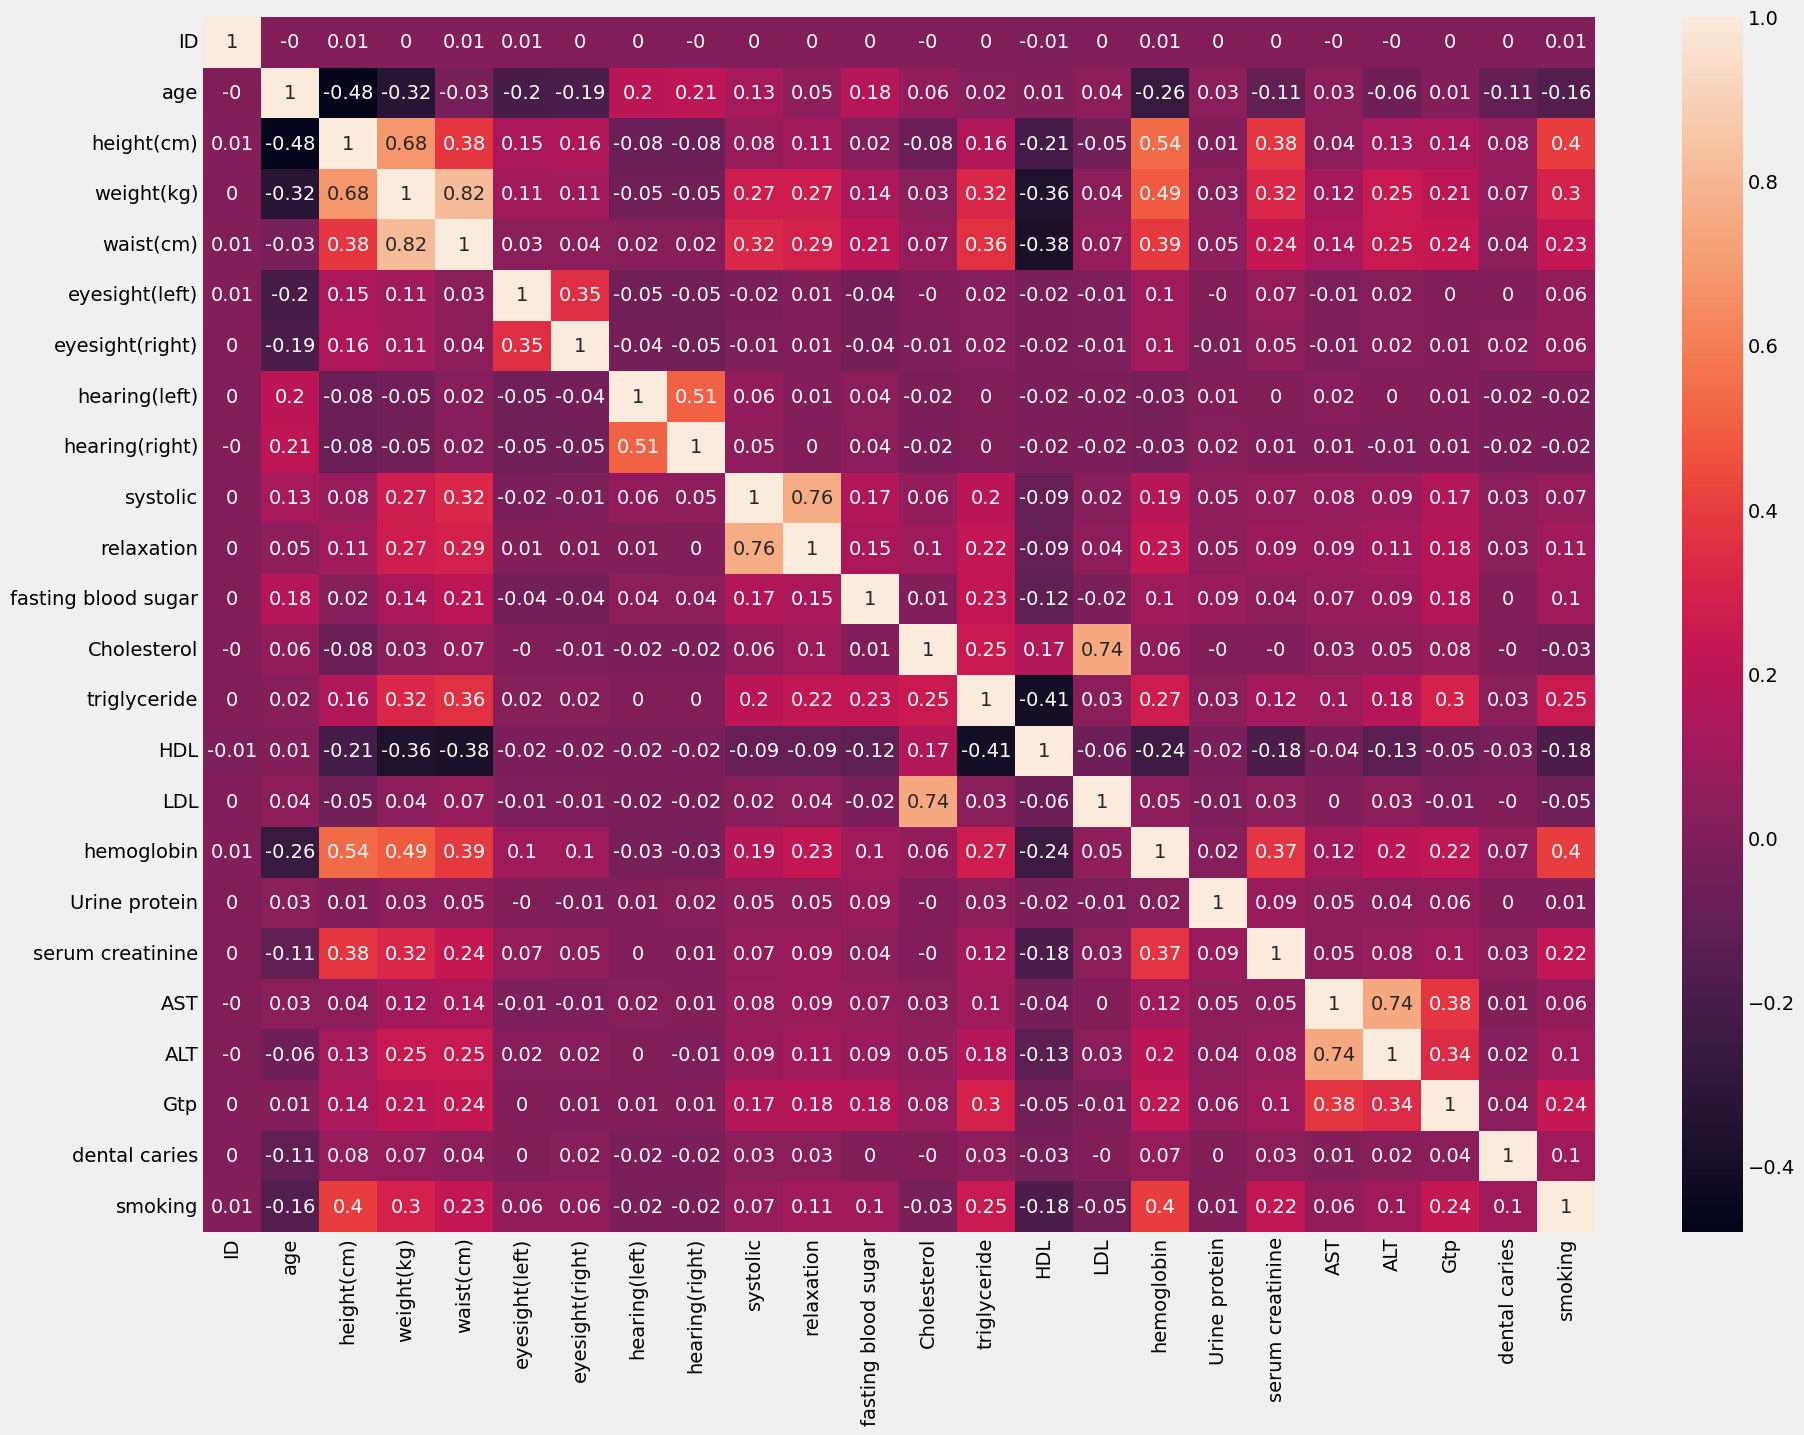

In [22]:
plt.figure(figsize=(20,15))
sns.heatmap(df[numerical_features].corr(method="pearson").round(2), annot=True)

In [23]:
correlation_matrix=df[numerical_features].corr(method="pearson").round(2)

In [24]:
positive_corr_smoking = correlation_matrix.columns[correlation_matrix["smoking"]>0]

# Display the column names with positive correlation to "smoking"
print("Columns which are positively correlated with smoking :\n\n\n",positive_corr_smoking)

print("_____________________________________________________________________________________\n\n")
negative_corr_smoking = correlation_matrix.columns[correlation_matrix["smoking"]<0]

print("Columns which are negatively correlated with smoking :\n\n\n",negative_corr_smoking)


Columns which are positively correlated with smoking :


 Index(['ID', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar',
       'triglyceride', 'hemoglobin', 'Urine protein', 'serum creatinine',
       'AST', 'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')
_____________________________________________________________________________________


Columns which are negatively correlated with smoking :


 Index(['age', 'hearing(left)', 'hearing(right)', 'Cholesterol', 'HDL', 'LDL'], dtype='object')


<div class="alert alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
* Below code i created by myself so be aware if u use in production

In [25]:
# we can plot correlation between target and other features
# 

def plot_variable_correlation(df, variable):
    """
    Plot the correlation between a specific variable and all other variables in the dataset.
    
    Parameters:
        df (DataFrame): The pandas DataFrame containing the dataset.
        variable (str): The name of the variable to check correlation with.
    """
    # Calculate correlation coefficients
    correlation_matrix = df[numerical_features].corr(method="pearson").round(2)
    variable_correlation = correlation_matrix[variable].drop(variable)  # Drop self-correlation

    # Plot correlation coefficients
    plt.figure(figsize=(12,5))
    sns.barplot(x=variable_correlation.index, y=variable_correlation.values, palette="viridis")
    plt.xlabel("Variable")
    plt.ylabel("Correlation Coefficient")
    plt.title(f"Correlation with {variable}")
    plt.xticks(rotation=90, ha="right")
    plt.tight_layout()
    plt.show()


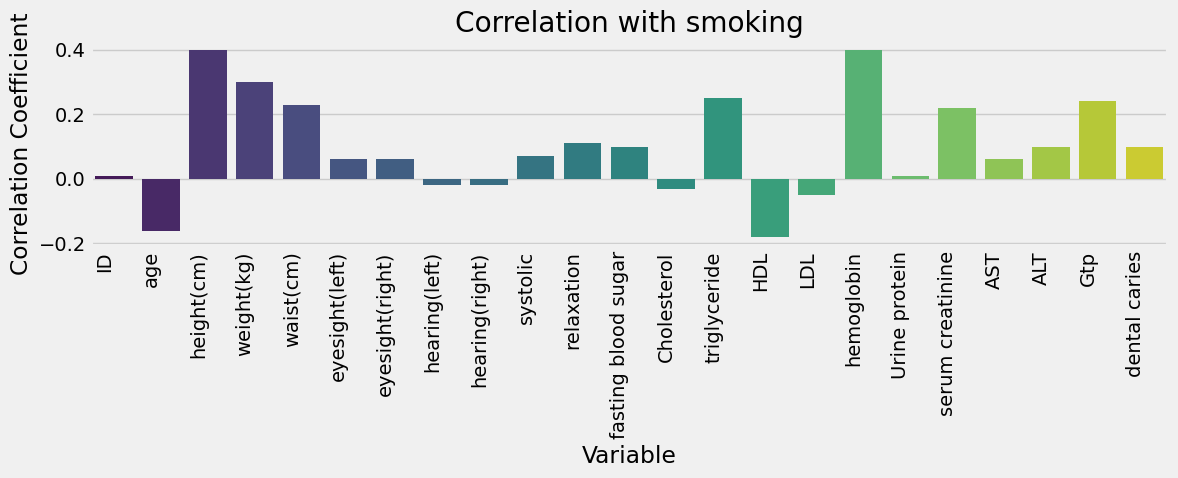

In [26]:
# Assuming df is your DataFrame and "target_variable" is the variable to check correlation with
plot_variable_correlation(df, "smoking")

# <span style="text-align:center">⬇️ preprocessing</span>

ID                         Axes(0.08,0.740345;0.124286x0.139655)
age                    Axes(0.229143,0.740345;0.124286x0.139655)
height(cm)             Axes(0.378286,0.740345;0.124286x0.139655)
weight(kg)             Axes(0.527429,0.740345;0.124286x0.139655)
waist(cm)              Axes(0.676571,0.740345;0.124286x0.139655)
eyesight(left)         Axes(0.825714,0.740345;0.124286x0.139655)
eyesight(right)            Axes(0.08,0.572759;0.124286x0.139655)
hearing(left)          Axes(0.229143,0.572759;0.124286x0.139655)
hearing(right)         Axes(0.378286,0.572759;0.124286x0.139655)
systolic               Axes(0.527429,0.572759;0.124286x0.139655)
relaxation             Axes(0.676571,0.572759;0.124286x0.139655)
fasting blood sugar    Axes(0.825714,0.572759;0.124286x0.139655)
Cholesterol                Axes(0.08,0.405172;0.124286x0.139655)
triglyceride           Axes(0.229143,0.405172;0.124286x0.139655)
HDL                    Axes(0.378286,0.405172;0.124286x0.139655)
LDL                    Ax

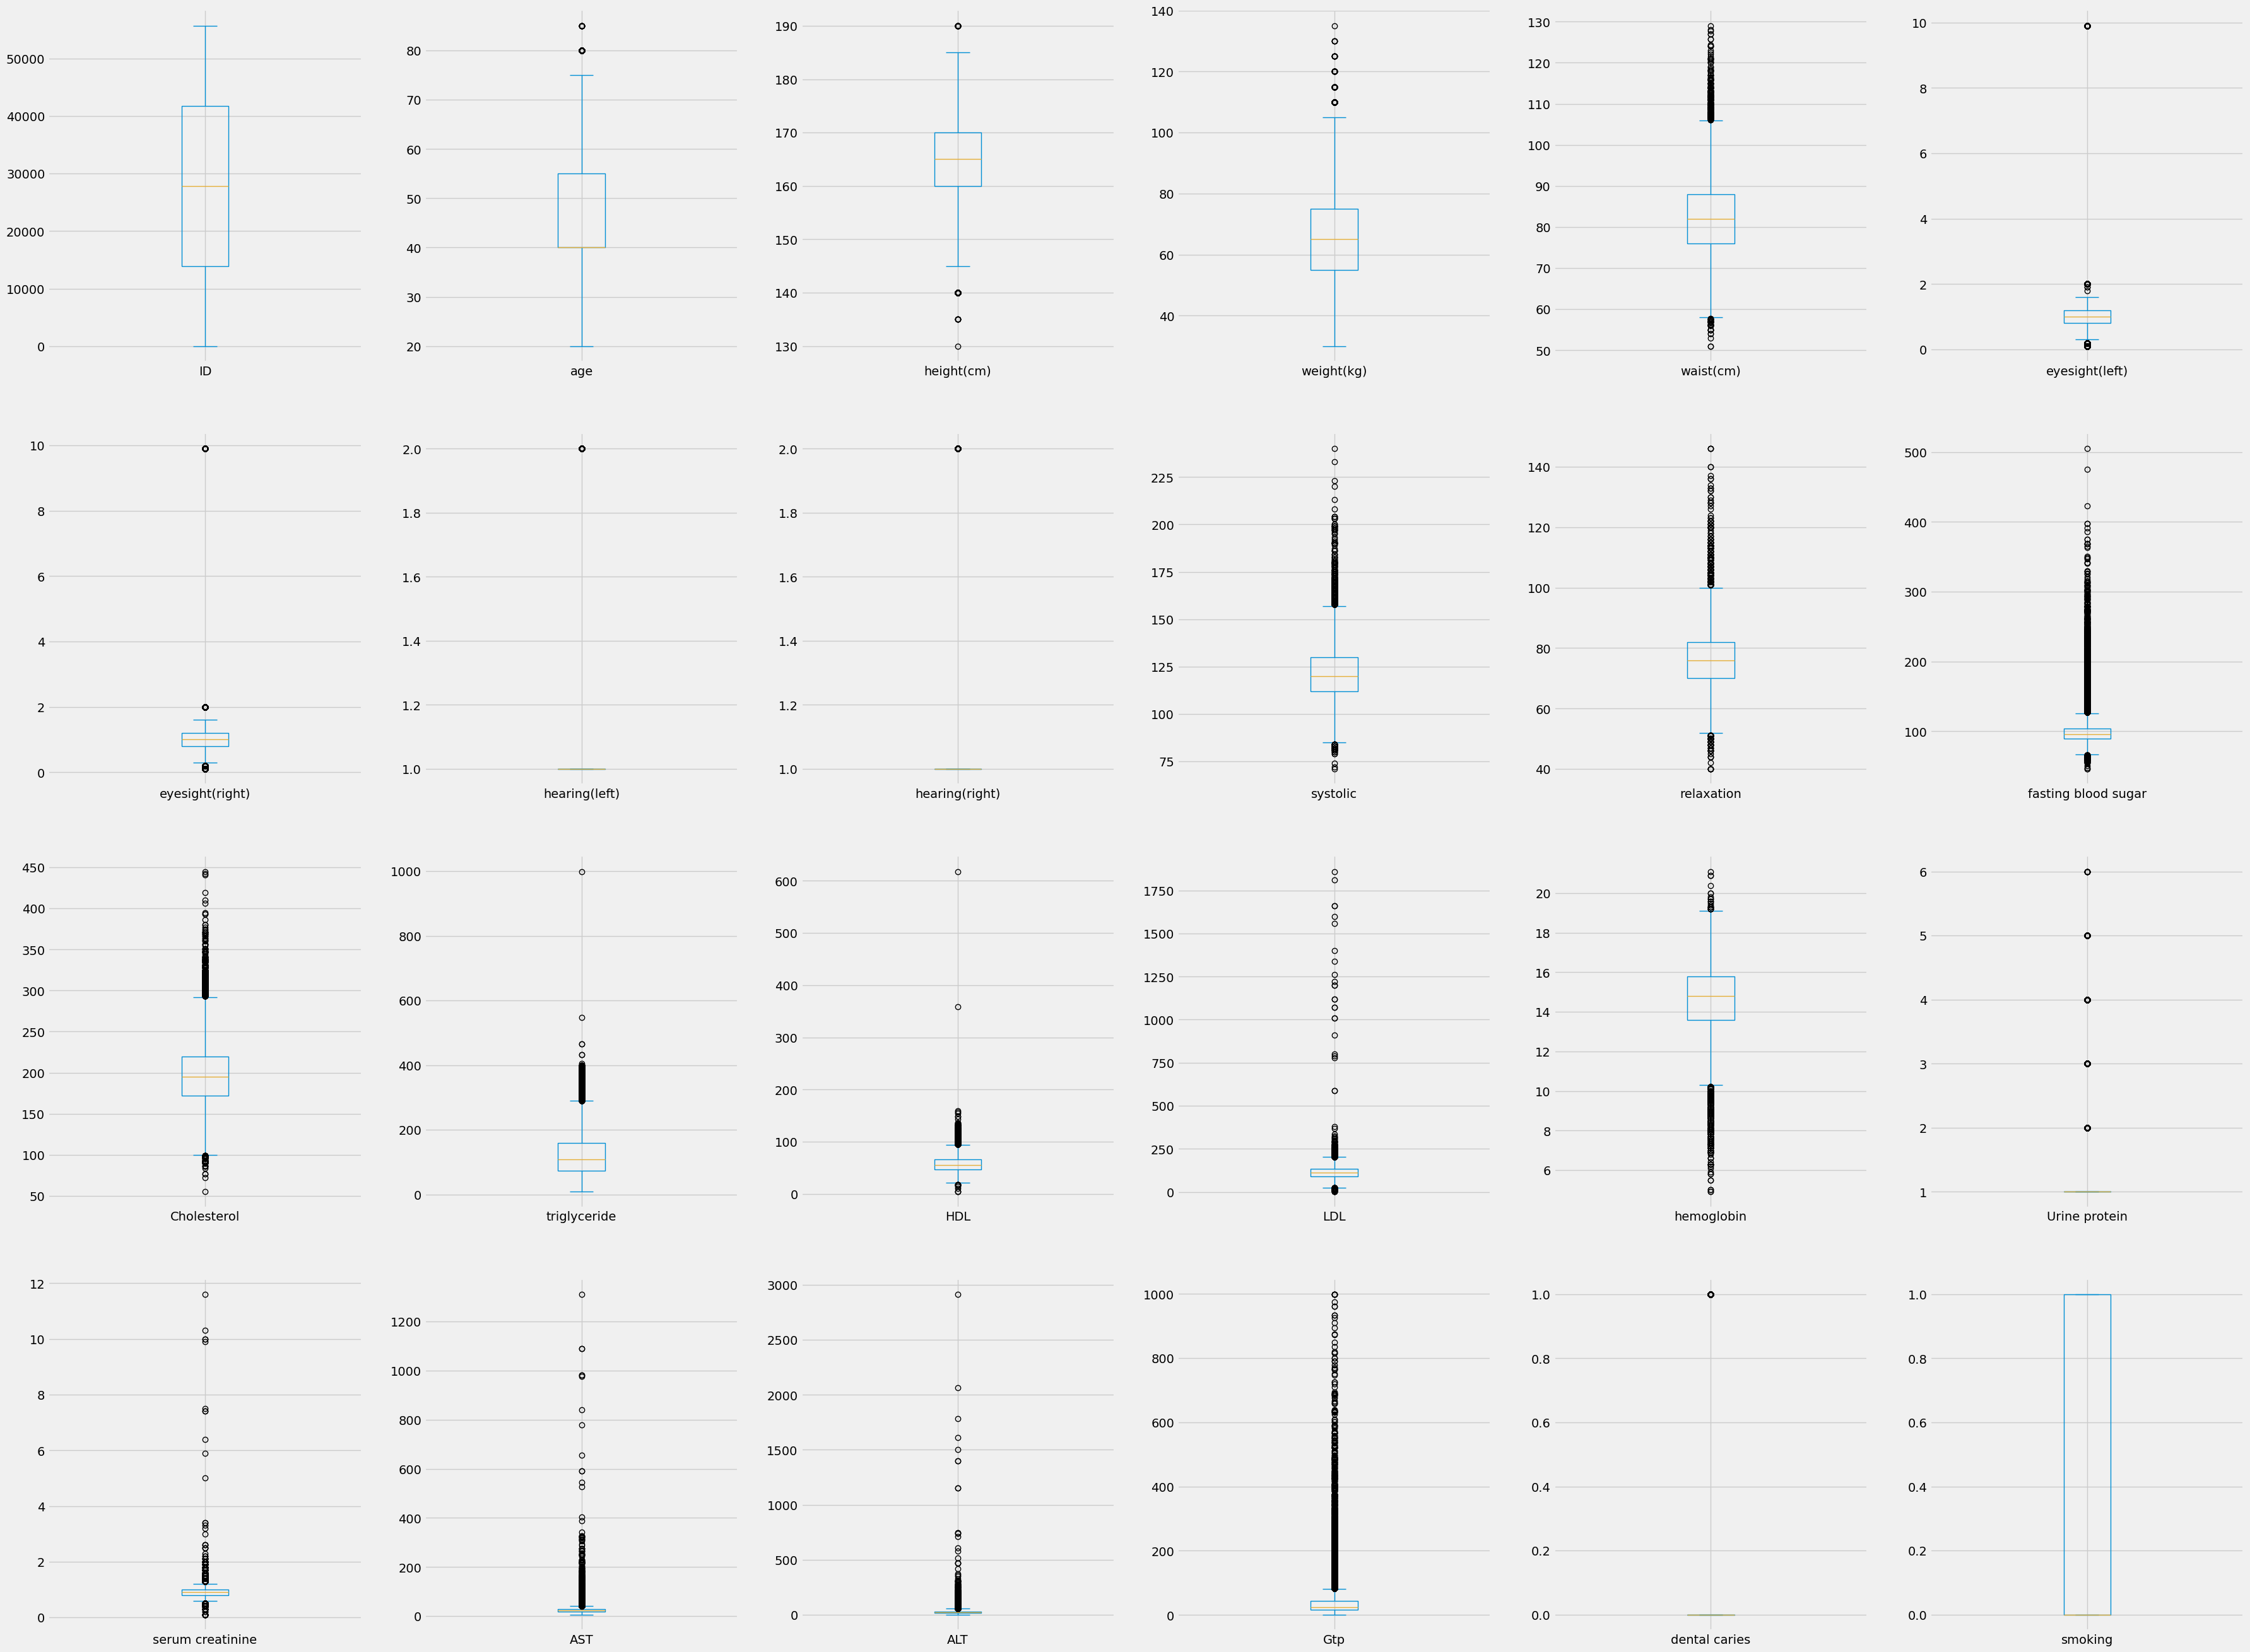

In [27]:
df.plot(kind="box",
       layout=(5,6),
       sharex=False,
       sharey=False,
       vert=True,
       figsize=(40,40),
       subplots=True)

In [28]:
outliers=['weight(kg)','waist(cm)','systolic','relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride','LDL', 'hemoglobin','serum creatinine', 'AST', 'ALT', 'Gtp', ]

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

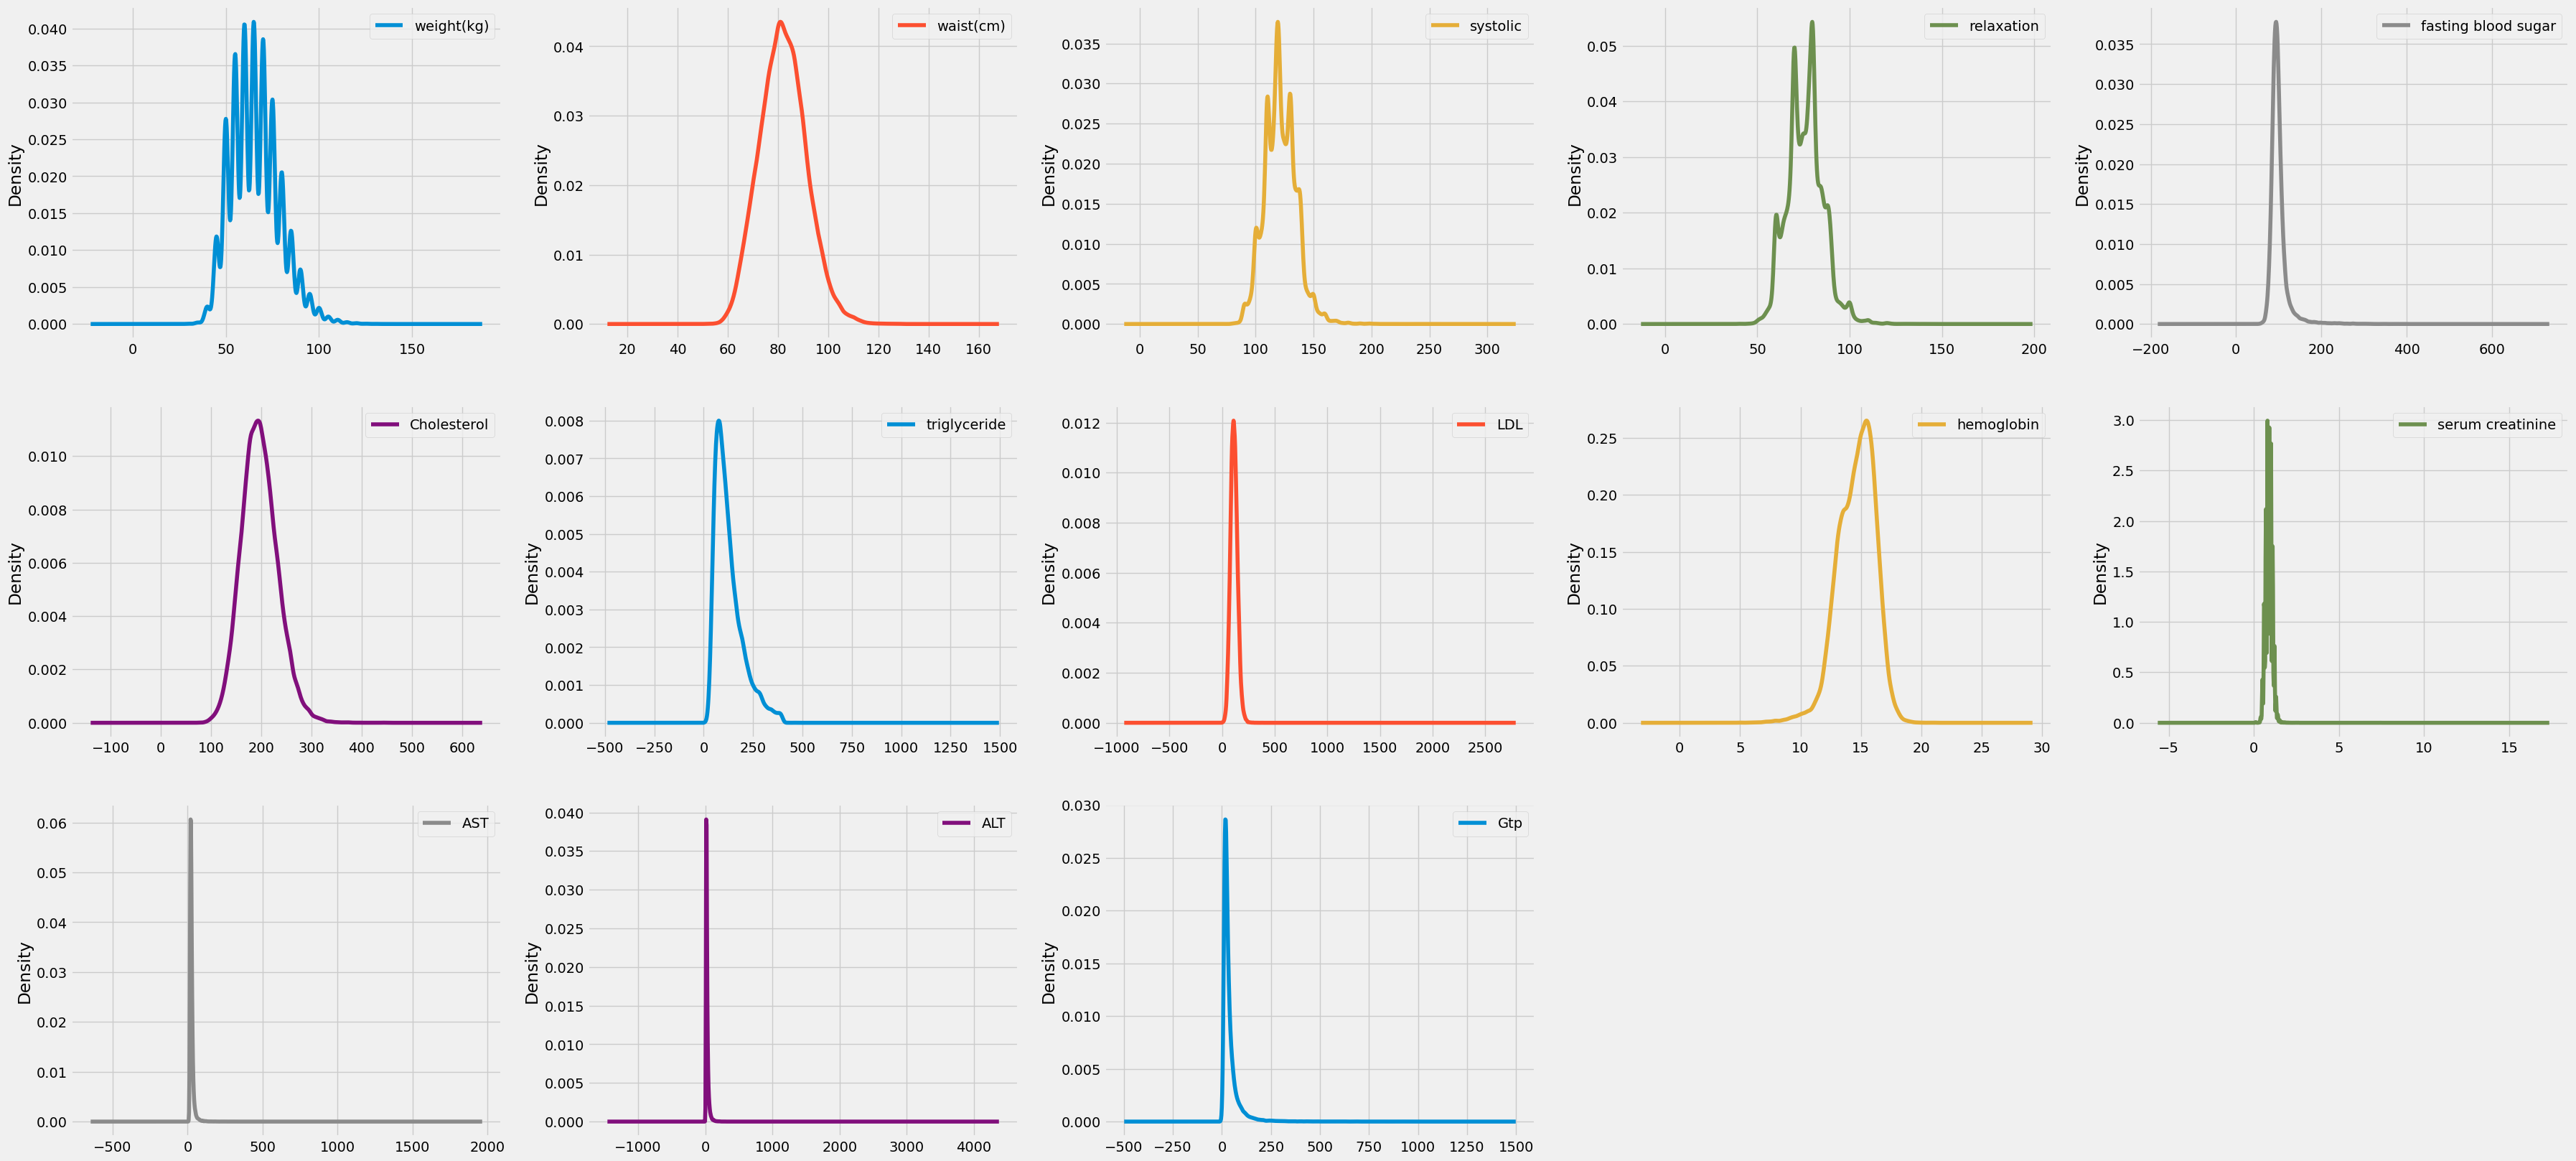

In [29]:
df[outliers].plot(kind="density",
       subplots=True,
       layout=(6,5),
       sharex=False,
       sharey=False,
       figsize=(40,40),
       )

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='green'>💡 Observations:</font></h3>

* data is normally distributed so we use z score with capping so info will not lost

In [30]:
#  we will remove the outliers 
def rem_outliers(df,outliers):
    for var in outliers:
        upper=df[var].mean()+(3*df[var].std())
        lower=df[var].mean()-(3*df[var].std())
        
        df[var]=np.where(
        df[var]>upper,
            upper,
            np.where(
            df[var]<lower,
            lower,
             df[var])
           
        )

In [31]:
rem_outliers(df, outliers)

In [32]:
df["systolic"].max()

162.52218604243973

ID                         Axes(0.08,0.740345;0.124286x0.139655)
age                    Axes(0.229143,0.740345;0.124286x0.139655)
height(cm)             Axes(0.378286,0.740345;0.124286x0.139655)
weight(kg)             Axes(0.527429,0.740345;0.124286x0.139655)
waist(cm)              Axes(0.676571,0.740345;0.124286x0.139655)
eyesight(left)         Axes(0.825714,0.740345;0.124286x0.139655)
eyesight(right)            Axes(0.08,0.572759;0.124286x0.139655)
hearing(left)          Axes(0.229143,0.572759;0.124286x0.139655)
hearing(right)         Axes(0.378286,0.572759;0.124286x0.139655)
systolic               Axes(0.527429,0.572759;0.124286x0.139655)
relaxation             Axes(0.676571,0.572759;0.124286x0.139655)
fasting blood sugar    Axes(0.825714,0.572759;0.124286x0.139655)
Cholesterol                Axes(0.08,0.405172;0.124286x0.139655)
triglyceride           Axes(0.229143,0.405172;0.124286x0.139655)
HDL                    Axes(0.378286,0.405172;0.124286x0.139655)
LDL                    Ax

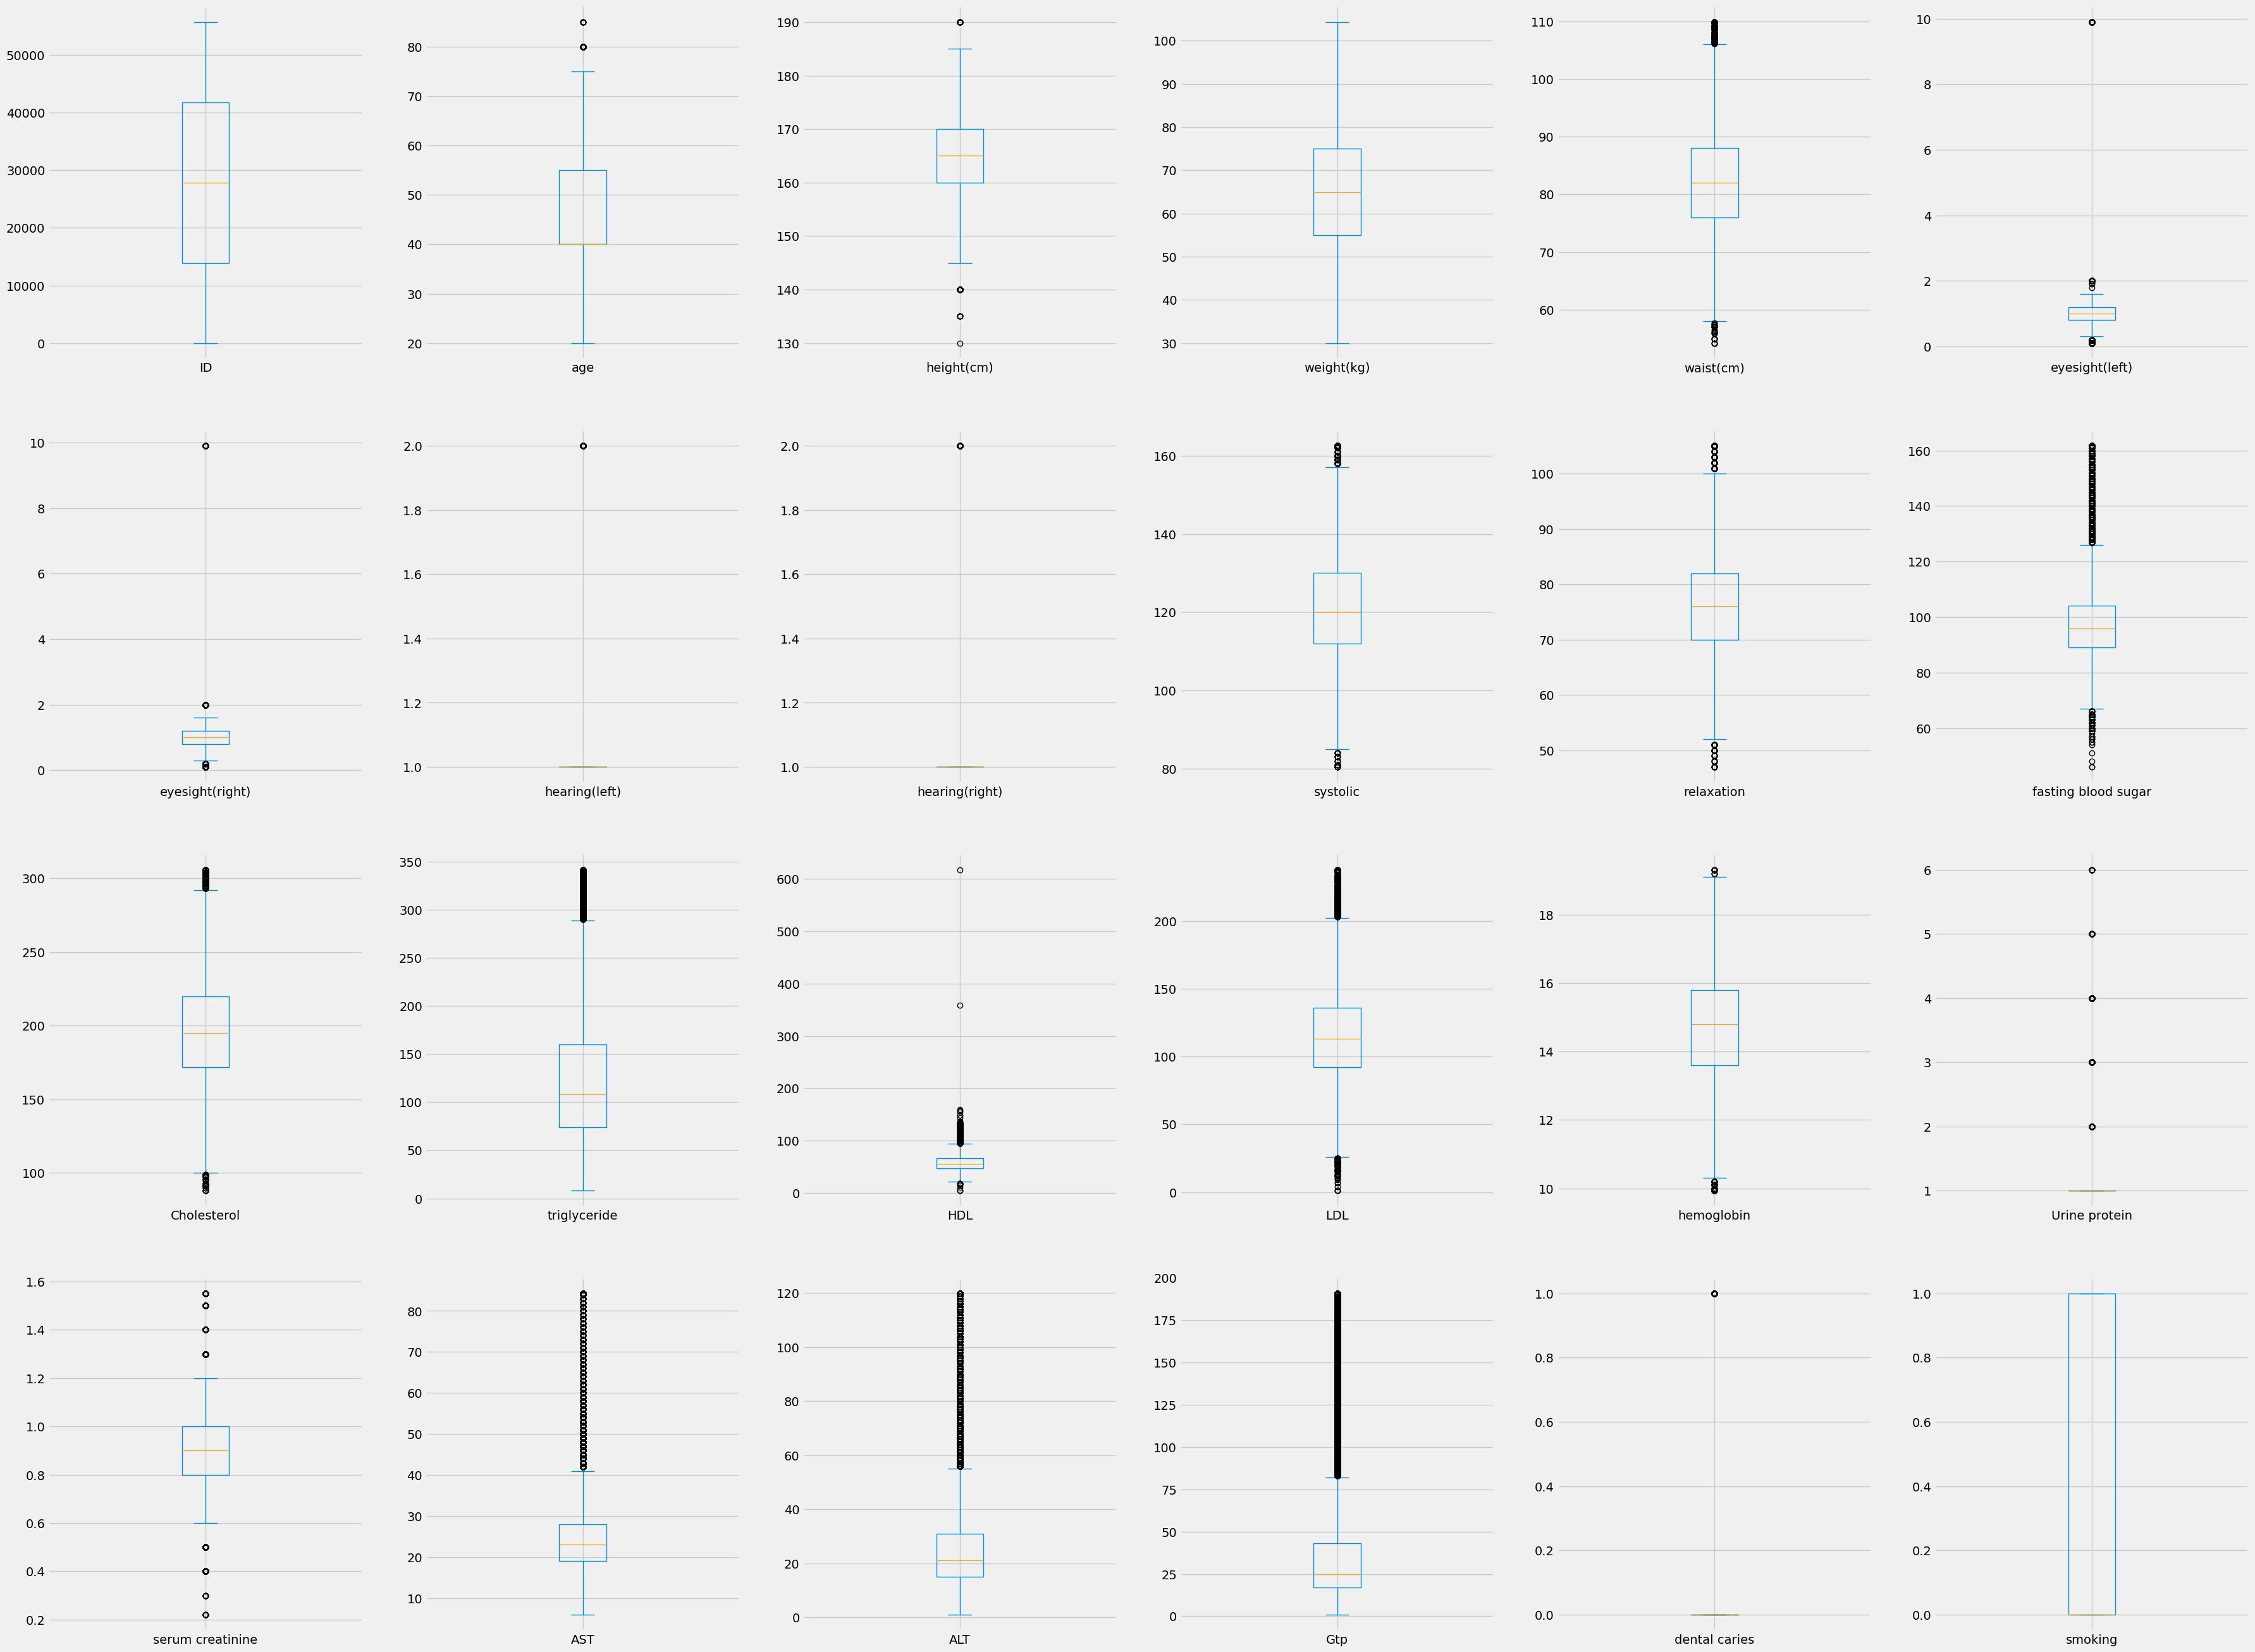

In [33]:
# we will plot boxplot to see if the outliers are removed
df.plot(kind="box",
       layout=(5,6),
       sharex=False,
       sharey=False,
       vert=True,
       figsize=(40,40),
       subplots=True)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

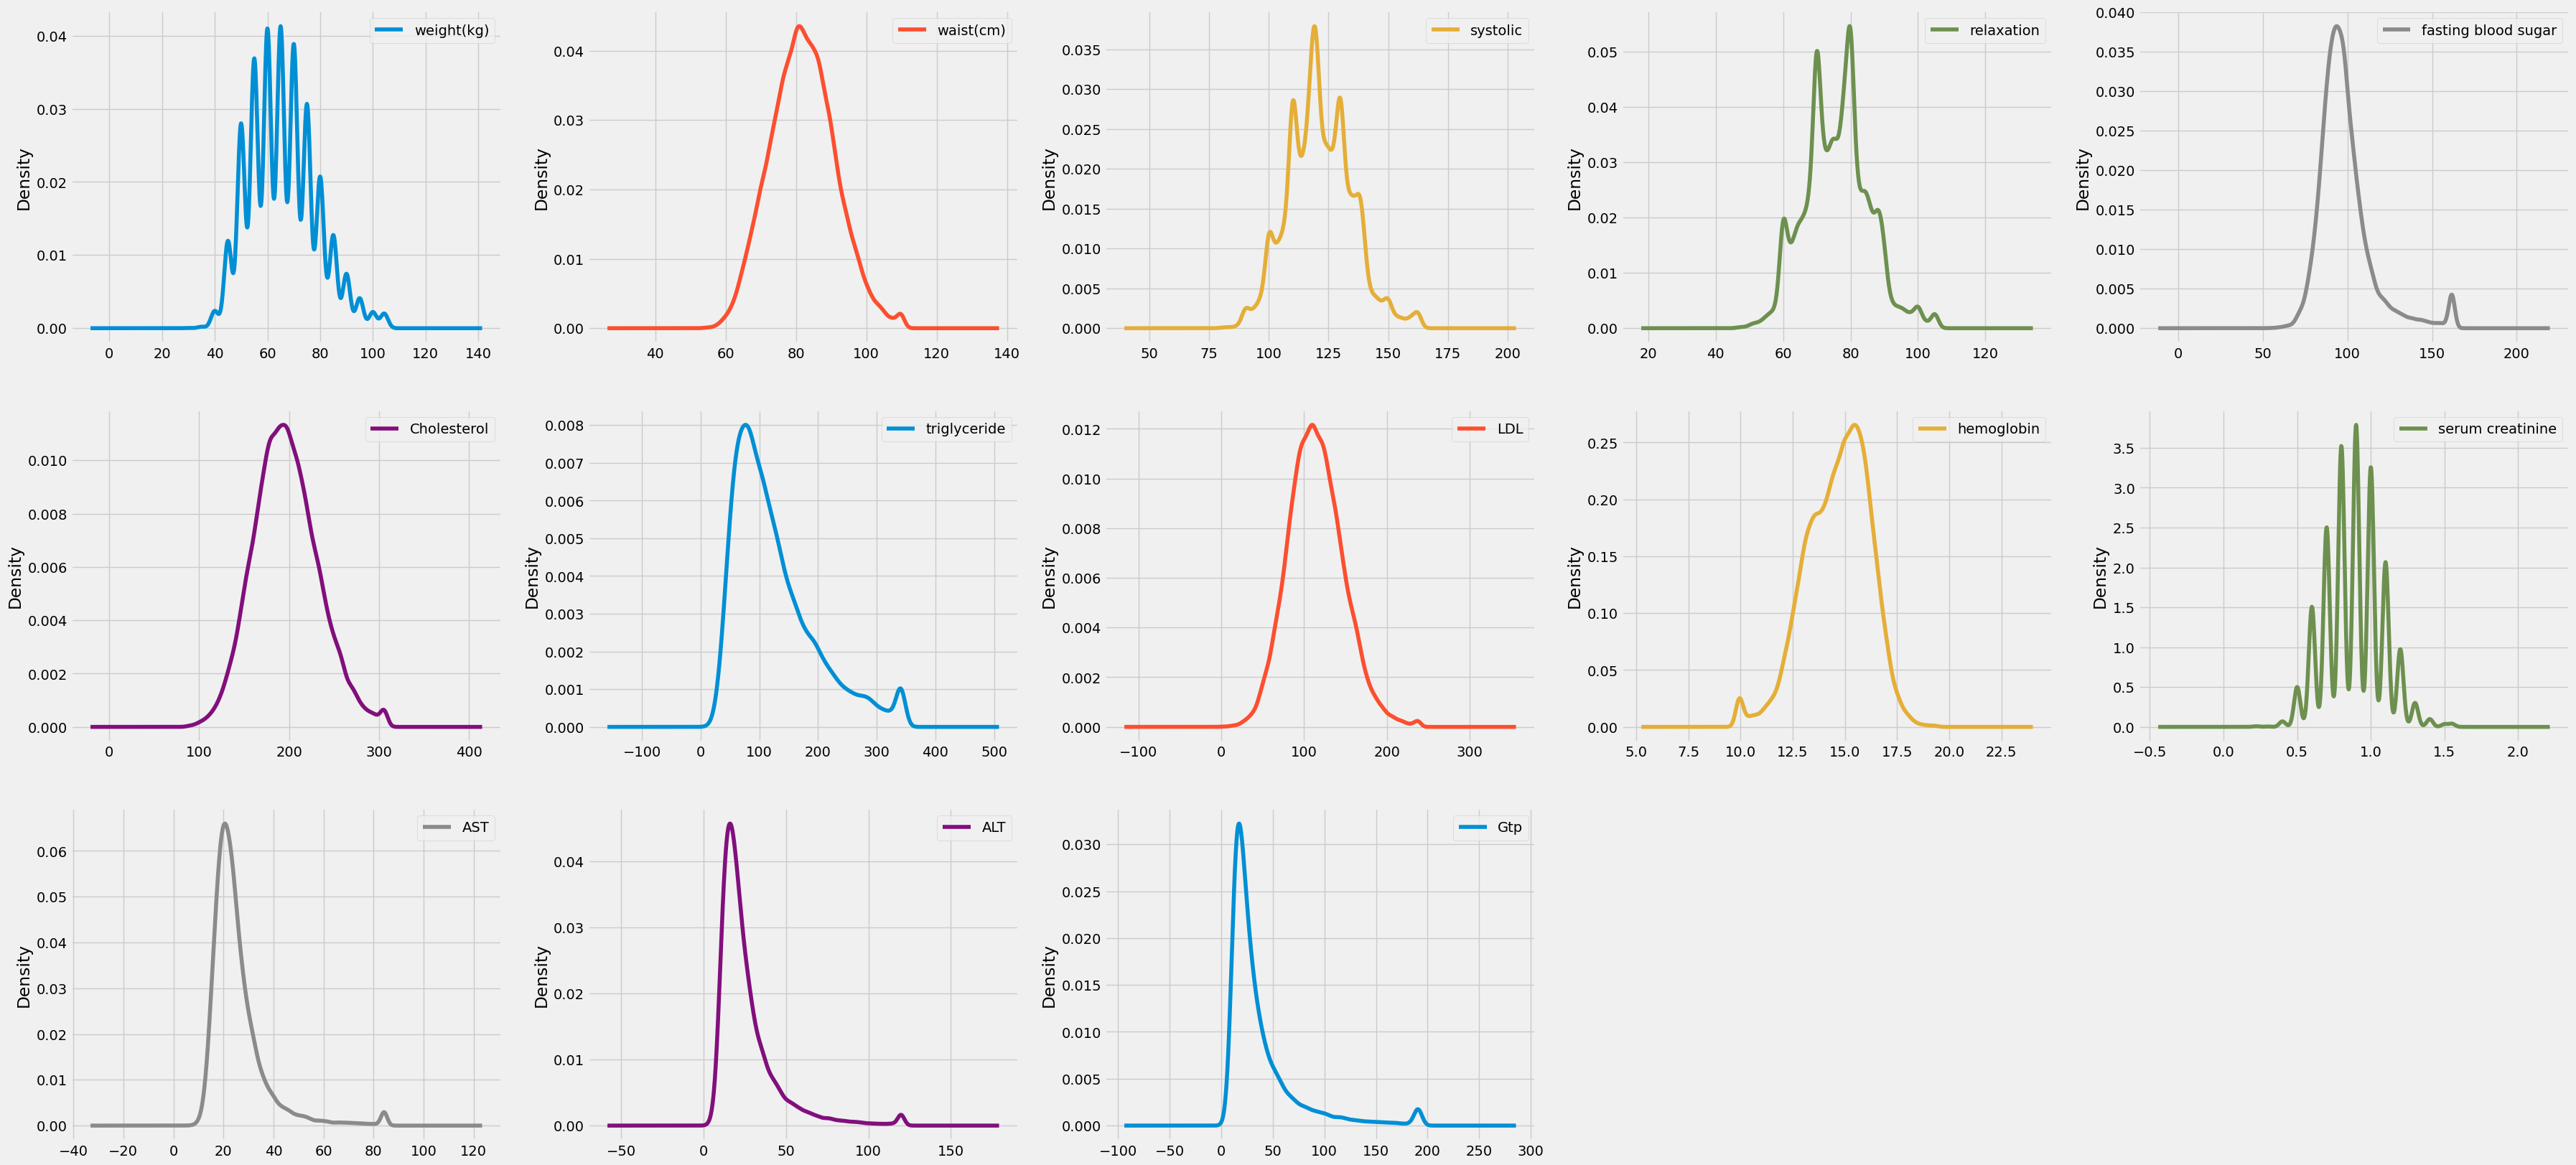

In [34]:
#  Density plot after removal of outliers
df[outliers].plot(kind="density",
       subplots=True,
       layout=(6,5),
       sharex=False,
       sharey=False,
       figsize=(40,40),
       )

In [35]:
df["smoking"].value_counts()

smoking
0    35237
1    20455
Name: count, dtype: int64

<div class="alert alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
Dataset is not that imbalanced

In [36]:
df.drop("ID", inplace=True, axis=1)

In [37]:
X=df.drop("smoking", axis=1)
y=df["smoking"]

In [38]:
# we will split the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)

In [39]:
print("X Train dataset shape :", X_train.shape)
print("X Test dataset shape :", X_test.shape)
print("Y Train dataset shape :", y_train.shape)
print("Y Test dataset shape :", y_test.shape)

X Train dataset shape : (44553, 25)
X Test dataset shape : (11139, 25)
Y Train dataset shape : (44553,)
Y Test dataset shape : (11139,)


In [40]:
numerical_features=[var for var in X.columns if df[var].dtypes!="O"]
categorical_features=[var for var in X.columns if df[var].dtypes=="O"]


In [41]:
preprocessor=ColumnTransformer(transformers=[
    ("num_pipe",StandardScaler(),numerical_features),
    ("cat_pipe",OneHotEncoder(sparse=False,drop="first"),categorical_features)
])

In [42]:
rfc_model=Pipeline([
    ("preprocessor_pipe",preprocessor),
    ("model",RandomForestClassifier())
])

In [43]:
rfc_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor_pipe',
                 ColumnTransformer(transformers=[('num_pipe', StandardScaler(),
                                                  ['age', 'height(cm)',
                                                   'weight(kg)', 'waist(cm)',
                                                   'eyesight(left)',
                                                   'eyesight(right)',
                                                   'hearing(left)',
                                                   'hearing(right)', 'systolic',
                                                   'relaxation',
                                                   'fasting blood sugar',
                                                   'Cholesterol',
                                                   'triglyceride', 'HDL', 'LDL',
                                                   'hemoglobin',
                                                   'Urine protein',
                                                   'serum creatinine', 'AST',
                                                   'ALT', 'Gtp',
                                                   'dental caries']),
                                                 ('cat_pipe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['gender', 'oral',
                                                   'tartar'])])),
                ('model', RandomForestClassifier())])

In [44]:
rfc_pred=rfc_model.predict(X_test)

In [45]:
confusion_matrix(rfc_pred,y_test)

array([[6031,  864],
       [1017, 3227]])

In [46]:
accuracy_score(rfc_pred,y_test)

0.8311338540263937

In [47]:
print(classification_report(rfc_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      6895
           1       0.79      0.76      0.77      4244

    accuracy                           0.83     11139
   macro avg       0.82      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139



In [48]:
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5, 10],
}

In [49]:
grid_search=GridSearchCV(estimator=rfc_model,param_grid=param_grid,scoring="accuracy",n_jobs=-1,cv=5)

In [50]:
grid_search.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor_pipe',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'height(cm)',
                                                                          'weight(kg)',
                                                                          'waist(cm)',
                                                                          'eyesight(left)',
                                                                          'eyesight(right)',
                                                                          'hearing(left)',
                                                                          'hearing(right)',
                                                                          'systolic',
                                                                          'relaxation',
                                                                          'fasting '
                                                                          'blood '
                                                                          'sugar',
                                                                          'Cholesterol',
                                                                          'triglyceride',
                                                                          'HDL',
                                                                          'LDL',
                                                                          'hemoglobin',
                                                                          'Urine '
                                                                          'protein',
                                                                          'serum '
                                                                          'creatinine',
                                                                          'AST',
                                                                          'ALT',
                                                                          'Gtp',
                                                                          'dental '
                                                                          'caries']),
                                                                        ('cat_pipe',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['gender',
                                                                          'oral',
                                                                          'tartar'])])),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 5, 10],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 200]},
             scoring='accuracy')

In [51]:
print("Best params :",grid_search.best_params_,"\n")

print("Best score :",grid_search.best_score_)

Best params : {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 200} 

Best score : 0.8216954895404751


In [52]:
from xgboost import XGBClassifier

In [53]:
xgb_model=Pipeline([
    ("preprocessor_pipe",preprocessor),
    ("model",XGBClassifier())
])

In [54]:
xgb_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor_pipe',
                 ColumnTransformer(transformers=[('num_pipe', StandardScaler(),
                                                  ['age', 'height(cm)',
                                                   'weight(kg)', 'waist(cm)',
                                                   'eyesight(left)',
                                                   'eyesight(right)',
                                                   'hearing(left)',
                                                   'hearing(right)', 'systolic',
                                                   'relaxation',
                                                   'fasting blood sugar',
                                                   'Cholesterol',
                                                   'triglyceride', 'HDL', 'LDL',
                                                   'hemoglobin',
                                                   'Urine protein',
                                                   'serum creatinine', 'AST',
                                                   'A...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [55]:
xgb_pred=xgb_model.predict(X_test)

In [56]:
print(classification_report(xgb_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      6889
           1       0.72      0.69      0.71      4250

    accuracy                           0.78     11139
   macro avg       0.77      0.76      0.77     11139
weighted avg       0.78      0.78      0.78     11139



In [57]:
# XGB confusion matrix
confusion_matrix(xgb_pred,y_test)

array([[5749, 1140],
       [1299, 2951]])

In [58]:
cv_scores_rfc = cross_val_score(rfc_model, X_train, y_train,scoring='accuracy', cv=25)  # cv=5 for 5-fold cross-validation

In [59]:
print("CV scores for Random forest model :", cv_scores_rfc)
print(" mean CV score for Random forest model :", cv_scores_rfc.mean())

CV scores for Random forest model : [0.83062255 0.83454851 0.84352215 0.82042649 0.8305275  0.83445567
 0.82491582 0.84231201 0.81818182 0.81649832 0.82547699 0.83108866
 0.83838384 0.832211   0.84511785 0.83670034 0.82940516 0.828844
 0.82154882 0.83670034 0.82491582 0.83894501 0.82940516 0.83164983
 0.83670034]
 mean CV score for Random forest model : 0.8313241595238229


In [60]:
cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train,scoring='accuracy', cv=25)  # cv=5 for 5-fold cross-validation

In [61]:
print("CV scores for XGB model :", cv_scores_xgb)
print(" mean CV score for XGB model :", cv_scores_xgb.mean())


CV scores for XGB model : [0.78911946 0.78407179 0.7980931  0.77721661 0.78282828 0.78338945
 0.78563412 0.79573513 0.76487093 0.76936027 0.77216611 0.78282828
 0.78507295 0.78563412 0.79741863 0.7979798  0.77441077 0.78731762
 0.77328844 0.78170595 0.78787879 0.79012346 0.79068462 0.79573513
 0.77946128]
 mean CV score for XGB model : 0.7844810037182444


<div class="alert alert-danger" style="font-size:14px; font-family:verdana; line-height: 1.7em;">

I want to check if my model is overfitting or not?

In [62]:
from sklearn.model_selection import KFold

In [63]:
kfold=KFold(n_splits=5,shuffle=True,random_state=4,)

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
kfold_score = cross_val_score(rfc_model, X_train, y_train, cv=kfold, scoring="accuracy", n_jobs=-1)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [66]:
print("KFOLD scores",kfold_score)
print("KFOLD scores mean",kfold_score.mean())
print("KFOLD scores standard deviation",kfold_score.std())

KFOLD scores [0.81517226 0.81528448 0.82414993 0.81111111 0.81380471]
KFOLD scores mean 0.8159044981668704
KFOLD scores standard deviation 0.004388470081963255


<div class="alert alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">

the accuracy of random forest without cross-validation is only slightly higher than the average cross-validation accuracy or approximately equal, it suggests that the model is likely not overfitting, and its performance on unseen data is consistent with its performance on the training data.
    
So we will keep Random forest model with 83% accuracy